# Big Data Bowl 2026: WR Route & Convergence Analysis
---

In [141]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


### Load Data

In [ ]:
# File paths
input_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\114239_nfl_competition_files_published_analytics_final\combined\group_input.csv"
output_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\114239_nfl_competition_files_published_analytics_final\combined\group_output.csv"
supp_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\114239_nfl_competition_files_published_analytics_final\combined\supplementary_data.csv"

# Load data
df_input = pd.read_csv(input_path, low_memory=False)
df_output = pd.read_csv(output_path)
df_supp = pd.read_csv(supp_path)

print(f"  - Input data shape: {df_input.shape}")
print(f"  - Output data shape: {df_output.shape}")
print(f"  - Supplementary data shape: {df_supp.shape}")

Loading data...

Data loaded successfully!
  - Input data shape: (4880579, 23)
  - Output data shape: (562936, 6)
  - Supplementary data shape: (18009, 41)


### Explore Input Data (Pre-Throw Tracking)

In [138]:
print("INPUT DATA")
print(f"Shape: {df_input.shape}")
print(f"Columns: {list(df_input.columns)}")
print(df_input.head())
print("\nINPUT DATA KEY STATISTICS")
print(f"Unique games: {df_input['game_id'].nunique()}")
print(f"Unique plays: {df_input.groupby(['game_id', 'play_id']).ngroups}")
print(f"Unique players: {df_input['nfl_id'].nunique()}")
print(f"Player positions:")
print(df_input['player_position'].value_counts().head(10))
print(f"Player roles:")
print(df_input['player_role'].value_counts())
print(f"Player sides:")
print(df_input['player_side'].value_counts())

INPUT DATA
Shape: (4880579, 23)
Columns: ['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']
      game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  absolute_yardline_number player_name player_height  player_weight player_birth_date player_position player_side         player_role      x      y     s     a     dir       o  num_frames_output  ball_land_x  ball_land_y
0  2023090700      101              False   54527         1          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense  Defensive Coverage  52.33  36.94  0.09  0.39  322.40  238.24                 21    63.259998        -0.22
1  2023090700      101              False   54527      

### Explore Output Data (Post-Throw Tracking)

In [139]:
print("OUTPUT DATA")
print(f"Shape: {df_output.shape}")
print(f"Columns: {list(df_output.columns)}")
print(df_output.head())
print("\nOUTPUT DATA KEY STATISTICS")
print(f"Unique games: {df_output['game_id'].nunique()}")
print(f"Unique plays: {df_output.groupby(['game_id', 'play_id']).ngroups}")
print(f"Unique players: {df_output['nfl_id'].nunique()}")

OUTPUT DATA
Shape: (562936, 6)
Columns: ['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y']
      game_id  play_id  nfl_id  frame_id      x      y
0  2023090700      101   46137         1  56.22  17.28
1  2023090700      101   46137         2  56.63  16.88
2  2023090700      101   46137         3  57.06  16.46
3  2023090700      101   46137         4  57.48  16.02
4  2023090700      101   46137         5  57.91  15.56

OUTPUT DATA KEY STATISTICS
Unique games: 272
Unique plays: 14108
Unique players: 1178


### Explore Supplementary Data

In [140]:
print("SUPPLEMENTARY DATA")
print(f"Shape: {df_supp.shape}")
print(f"Columns: {list(df_supp.columns)}")
print(df_supp.head())
print("\nSUPPLEMENTARY DATA KEY STATISTICS")
print(f"Pass results:")
print(df_supp['pass_result'].value_counts())
print(f"C = Complete")
print(f"I = Incomplete")
print(f"IN = Interception")
print(f"Route types (top 10):")
print(df_supp['route_of_targeted_receiver'].value_counts().head(10))

SUPPLEMENTARY DATA
Shape: (18009, 41)
Columns: ['game_id', 'season', 'week', 'game_date', 'game_time_eastern', 'home_team_abbr', 'visitor_team_abbr', 'play_id', 'play_description', 'quarter', 'game_clock', 'down', 'yards_to_go', 'possession_team', 'defensive_team', 'yardline_side', 'yardline_number', 'pre_snap_home_score', 'pre_snap_visitor_score', 'play_nullified_by_penalty', 'pass_result', 'pass_length', 'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver', 'play_action', 'dropback_type', 'dropback_distance', 'pass_location_type', 'defenders_in_the_box', 'team_coverage_man_zone', 'team_coverage_type', 'penalty_yards', 'pre_penalty_yards_gained', 'yards_gained', 'expected_points', 'expected_points_added', 'pre_snap_home_team_win_probability', 'pre_snap_visitor_team_win_probability', 'home_team_win_probability_added', 'visitor_team_win_probility_added']
      game_id  season  week   game_date game_time_eastern home_team_abbr visitor_team_abbr  play_id                

### Sample Play Analysis

In [ ]:
# Examine a single play to understand the data structure
sample_game_id = 2023090700
sample_play_id = 101

sample_input = df_input[(df_input['game_id'] == sample_game_id) & (df_input['play_id'] == sample_play_id)]
sample_output = df_output[(df_output['game_id'] == sample_game_id) & (df_output['play_id'] == sample_play_id)]
sample_supp = df_supp[(df_supp['game_id'] == sample_game_id) & (df_supp['play_id'] == sample_play_id)]

print(f"SAMPLE PLAY ANALYSIS")
print(f"Game ID: {sample_game_id}, Play ID: {sample_play_id}")
print(f"\nINPUT (Pre-throw):")
print(f"  Frames: {sample_input['frame_id'].min()} to {sample_input['frame_id'].max()} ({sample_input['frame_id'].nunique()} frames)")
print(f"  Unique players tracked: {sample_input['nfl_id'].nunique()}")
print(f"  Player roles breakdown:")
print(sample_input.groupby(['player_role', 'player_side']).size())

print(f"\nOUTPUT (Post-throw):")
print(f"  Frames: {sample_output['frame_id'].min()} to {sample_output['frame_id'].max()} ({sample_output['frame_id'].nunique()} frames)")
print(f"  Unique players tracked: {sample_output['nfl_id'].nunique()}")
print(f"  Player IDs: {sample_output['nfl_id'].unique()}")

print(f"\nSUPPLEMENTARY:")
print(f"  Pass result: {sample_supp['pass_result'].values[0]}")
print(f"  Route: {sample_supp['route_of_targeted_receiver'].values[0]}")
print(f"  Pass length: {sample_supp['pass_length'].values[0]}")
print(f"  Yards gained: {sample_supp['yards_gained'].values[0]}")

=== SAMPLE PLAY ANALYSIS ===
Game ID: 2023090700, Play ID: 101

INPUT (Pre-throw):
  Frames: 1 to 26 (26 frames)
  Unique players tracked: 9
  Player roles breakdown:
player_role         player_side
Defensive Coverage  Defense        130
Other Route Runner  Offense         52
Passer              Offense         26
Targeted Receiver   Offense         26
dtype: int64

OUTPUT (Post-throw):
  Frames: 1 to 21 (21 frames)
  Unique players tracked: 3
  Player IDs: [46137 52546 44930]

SUPPLEMENTARY:
  Pass result: I
  Route: CORNER
  Pass length: 22
  Yards gained: 0


---

## Data Schema & Key Findings
### Key Identifiers

#### **1. Targeted Receiver**
- In `df_input`: Filter rows where `player_to_predict == True`
- This identifies the WR who is the target of the pass

#### **2. Moment of Pass Release**
- The **last frame** in `df_input` for each play represents the moment of pass release
- Can be identified by: `df_input.groupby(['game_id', 'play_id'])['frame_id'].max()`

#### **3. Catch/Incomplete Frame**
- The **last frame** in `df_output` for each play represents when the ball arrives
- Join with `df_supp['pass_result']` to determine if caught ('C'), incomplete ('I'), or intercepted ('IN')

#### **4. Joining Supplementary Data**
- Use `(game_id, play_id)` as the join key
- All three datasets share these common identifiers
- Example: `df_input.merge(df_supp, on=['game_id', 'play_id'], how='left')`

### Data Assumptions

1. **Temporal split**: Input data ends at pass release; output data begins immediately after
2. **Player tracking**: All 22 players may be tracked pre-throw, but only selected players (receiver + defenders) post-throw
3. **Target identification**: `player_to_predict == True` uniquely identifies the intended receiver
4. **Coordinate system**: Same (x, y) coordinate system across both input and output
5. **Ball landing location**: `ball_land_x`, `ball_land_y` in input data tells us where the ball will land

---

---

## Phase 1: WR Route Modeling (Pre-throw)

### 1.1 Filter and Align WR Route Data

**Goal**: Extract targeted receiver routes from snap to pass release, normalize coordinates, and calculate derived features.

**Key decisions**:
- Use `player_role == 'Targeted Receiver'` to identify offensive WR targets
- Normalize coordinates so offense always moves left-to-right
- Sequence length: 45 frames (95th percentile)
- Assume 10 fps tracking (0.1s per frame)

---

#### Step 1: Filter to Targeted Receivers

In [97]:
# Filter to targeted receivers only
print("Filtering to targeted receivers...")
df_target_wr = df_input[df_input['player_role'] == 'Targeted Receiver'].copy()

print(f"Total rows: {len(df_target_wr):,}")
print(f"Unique plays: {df_target_wr.groupby(['game_id', 'play_id']).ngroups:,}")
print(f"Unique players: {df_target_wr['nfl_id'].nunique():,}")
print(f"\nPosition breakdown:")
print(df_target_wr['player_position'].value_counts())

Filtering to targeted receivers...
Total rows: 396,914
Unique plays: 14,108
Unique players: 464

Position breakdown:
player_position
WR     238910
TE      91654
RB      62327
FB       2407
QB        917
CB        565
T          83
ILB        30
DT         21
Name: count, dtype: int64


#### Step 2: Join with Supplementary Data

In [ ]:
# Join with supplementary data to get route labels and outcomes
# Select relevant columns from supplementary data
supp_cols = ['game_id', 'play_id', 'pass_result', 'route_of_targeted_receiver', 
             'pass_length', 'yards_gained', 'expected_points_added']
df_supp_subset = df_supp[supp_cols].copy()

# Merge
df_target_wr = df_target_wr.merge(df_supp_subset, on=['game_id', 'play_id'], how='left')

print(f"Rows after merge: {len(df_target_wr):,}")
print(f"\nPass result distribution:")
print(df_target_wr.groupby(['game_id', 'play_id'])['pass_result'].first().value_counts())
print(f"\nTop route types:")
print(df_target_wr.groupby(['game_id', 'play_id'])['route_of_targeted_receiver'].first().value_counts().head(10))

Joining with supplementary data...
Rows after merge: 396,914

Pass result distribution:
pass_result
C     9738
I     4032
IN     338
Name: count, dtype: int64

Top route types:
route_of_targeted_receiver
HITCH     2660
OUT       2214
FLAT      1983
CROSS     1496
GO        1397
IN        1107
SLANT     1049
POST       769
ANGLE      544
CORNER     509
Name: count, dtype: int64


#### Step 3: Normalize Coordinates

Create field-oriented coordinate system where offense always moves **left → right**.

**Normalization logic**:
- If `play_direction == 'left'`: flip both x and y coordinates
- If `play_direction == 'right'`: keep as is
- Field dimensions: 120 yards (length) × 53.3 yards (width)

In [ ]:
# Normalize coordinates
def normalize_coordinates(df):
    """
    Normalize coordinates so offense always moves left to right.
    
    Parameters:
    - df: DataFrame with columns [x, y, play_direction, dir, o]
    
    Returns:
    - df with additional columns [x_norm, y_norm, dir_norm, o_norm]
    """
    df = df.copy()
    
    # Initialize normalized columns
    df['x_norm'] = df['x']
    df['y_norm'] = df['y']
    df['dir_norm'] = df['dir']
    df['o_norm'] = df['o']
    
    # Flip coordinates for plays going left
    left_mask = df['play_direction'] == 'left'
    
    df.loc[left_mask, 'x_norm'] = 120 - df.loc[left_mask, 'x']
    df.loc[left_mask, 'y_norm'] = 53.3 - df.loc[left_mask, 'y']
    df.loc[left_mask, 'dir_norm'] = (df.loc[left_mask, 'dir'] + 180) % 360
    df.loc[left_mask, 'o_norm'] = (df.loc[left_mask, 'o'] + 180) % 360
    
    return df

# Apply normalization
df_target_wr = normalize_coordinates(df_target_wr)

print("Normalization complete!")
print(f"\nCoordinate ranges after normalization:")
print(f"  x_norm: {df_target_wr['x_norm'].min():.1f} to {df_target_wr['x_norm'].max():.1f}")
print(f"  y_norm: {df_target_wr['y_norm'].min():.1f} to {df_target_wr['y_norm'].max():.1f}")

Normalizing coordinates...
Normalization complete!

Coordinate ranges after normalization:
  x_norm: 5.2 to 119.5
  y_norm: 0.6 to 52.6


#### Step 4: Calculate Derived Features

For each frame, calculate:
- `dx`, `dy`: Frame-to-frame displacement
- `speed`: Velocity magnitude (use existing `s` column or derive)
- `accel`: Acceleration (use existing `a` column or derive)
- `frame_time`: Time since snap (assuming 10 fps)

In [100]:
# Calculate derived features
print("Calculating derived features...")

def add_derived_features(df):
    """
    Add frame-to-frame displacement and temporal features.
    
    Assumes df is sorted by (game_id, play_id, frame_id).
    """
    df = df.copy()
    
    # Sort to ensure proper ordering
    df = df.sort_values(['game_id', 'play_id', 'frame_id']).reset_index(drop=True)
    
    # Calculate displacement (dx, dy)
    df['dx'] = df.groupby(['game_id', 'play_id'])['x_norm'].diff()
    df['dy'] = df.groupby(['game_id', 'play_id'])['y_norm'].diff()
    
    # Fill first frame with 0 (no previous frame)
    df['dx'] = df['dx'].fillna(0)
    df['dy'] = df['dy'].fillna(0)
    
    # Frame time (assuming 10 fps = 0.1s per frame)
    df['frame_time'] = (df['frame_id'] - 1) * 0.1  # Start at 0 for frame 1
    
    # Speed and acceleration are already in the data (s, a columns)
    # But we can also derive speed from displacement
    df['speed_derived'] = np.sqrt(df['dx']**2 + df['dy']**2) / 0.1  # yards per second
    
    return df

# Apply feature engineering
df_target_wr = add_derived_features(df_target_wr)

print("Derived features added!")
print(f"\nNew columns: dx, dy, frame_time, speed_derived")
print(f"\nSample data:")
print(df_target_wr[['game_id', 'play_id', 'frame_id', 'x_norm', 'y_norm', 'dx', 'dy', 's', 'a', 'frame_time']].head(10))

Calculating derived features...
Derived features added!

New columns: dx, dy, frame_time, speed_derived

Sample data:
      game_id  play_id  frame_id  x_norm  y_norm    dx    dy     s     a  frame_time
0  2023090700      101         1   41.03   12.17  0.00  0.00  0.00  0.00         0.0
1  2023090700      101         2   41.03   12.17  0.00  0.00  0.00  0.00         0.1
2  2023090700      101         3   41.05   12.18  0.02  0.01  0.02  0.47         0.2
3  2023090700      101         4   41.07   12.20  0.02  0.02  0.18  1.54         0.3
4  2023090700      101         5   41.11   12.22  0.04  0.02  0.57  3.09         0.4
5  2023090700      101         6   41.20   12.26  0.09  0.04  1.15  4.78         0.5
6  2023090700      101         7   41.33   12.33  0.13  0.07  1.71  5.15         0.6
7  2023090700      101         8   41.54   12.42  0.21  0.09  2.45  5.56         0.7
8  2023090700      101         9   41.79   12.53  0.25  0.11  3.06  5.15         0.8
9  2023090700      101        10

#### Step 5: Verify Data Quality

Check for:
- Missing values
- Outliers
- Frame count distribution

In [101]:
# Data quality checks
print("=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# Missing values
print("\n1. Missing values in key columns:")
cols_to_check = ['x_norm', 'y_norm', 'dx', 'dy', 's', 'a', 'dir_norm']
missing = df_target_wr[cols_to_check].isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "  No missing values!")

# Frame count distribution per route
print("\n2. Frame count distribution per route:")
route_lengths = df_target_wr.groupby(['game_id', 'play_id'])['frame_id'].agg(['min', 'max', 'count']).reset_index()
route_lengths['route_frames'] = route_lengths['max'] - route_lengths['min'] + 1

print(f"  Mean frames: {route_lengths['route_frames'].mean():.1f}")
print(f"  Median frames: {route_lengths['route_frames'].median():.1f}")
print(f"  90th percentile: {route_lengths['route_frames'].quantile(0.90):.0f}")
print(f"  95th percentile: {route_lengths['route_frames'].quantile(0.95):.0f}")
print(f"  Max frames: {route_lengths['route_frames'].max()}")

# Outlier detection
print("\n3. Speed outliers (> 15 yards/sec):")
speed_outliers = df_target_wr[df_target_wr['s'] > 15]
print(f"  Rows with speed > 15 yds/s: {len(speed_outliers)}")

print("\n" + "=" * 80)

DATA QUALITY CHECKS

1. Missing values in key columns:
  No missing values!

2. Frame count distribution per route:
  Mean frames: 28.1
  Median frames: 26.0
  90th percentile: 39
  95th percentile: 45
  Max frames: 123

3. Speed outliers (> 15 yards/sec):
  Rows with speed > 15 yds/s: 0



---

### 1.2 Route Sequence Representation (Option B: Engineered Features)

**Approach**: Create meaningful route features from the trajectory data.

**Features to engineer**:
1. Total route distance
2. Net forward gain (depth)
3. Net lateral movement (width)
4. Max speed
5. Average speed
6. Direction changes
7. Route endpoint coordinates
8. Acceleration statistics
9. Route duration
10. Speed variance

These features will serve as our route embeddings.

---

#### Step 1: Define Route Feature Engineering Function

In [102]:
def engineer_route_features(df):
    """
    Engineer route-level features for each (game_id, play_id).
    
    Parameters:
    - df: DataFrame with normalized coordinates and derived features
    
    Returns:
    - route_features_df: DataFrame with one row per route
    """
    
    # Group by route (game_id, play_id)
    routes = df.groupby(['game_id', 'play_id'])
    
    route_features = []
    
    for (game_id, play_id), route_df in routes:
        # Sort by frame to ensure proper ordering
        route_df = route_df.sort_values('frame_id').reset_index(drop=True)
        
        # Basic identifiers
        features = {
            'game_id': game_id,
            'play_id': play_id,
            'nfl_id': route_df['nfl_id'].iloc[0],
            'player_name': route_df['player_name'].iloc[0],
            'player_position': route_df['player_position'].iloc[0],
        }
        
        # 1. Total route distance (sum of displacements)
        features['route_distance'] = np.sqrt(route_df['dx']**2 + route_df['dy']**2).sum()
        
        # 2. Net forward gain (depth)
        features['route_depth'] = route_df['x_norm'].iloc[-1] - route_df['x_norm'].iloc[0]
        
        # 3. Net lateral movement (width)
        features['route_width'] = abs(route_df['y_norm'].iloc[-1] - route_df['y_norm'].iloc[0])
        
        # 4. Final position (endpoint)
        features['final_x'] = route_df['x_norm'].iloc[-1]
        features['final_y'] = route_df['y_norm'].iloc[-1]
        
        # 5. Max speed
        features['max_speed'] = route_df['s'].max()
        
        # 6. Average speed
        features['avg_speed'] = route_df['s'].mean()
        
        # 7. Speed variance
        features['speed_std'] = route_df['s'].std()
        
        # 8. Max acceleration
        features['max_accel'] = route_df['a'].max()
        
        # 9. Average acceleration
        features['avg_accel'] = route_df['a'].mean()
        
        # 10. Direction changes (count significant changes > 30 degrees)
        dir_changes = route_df['dir_norm'].diff().abs()
        # Handle wrap-around (e.g., 359 -> 1 is actually 2 degrees, not 358)
        dir_changes = dir_changes.apply(lambda x: min(x, 360 - x) if not np.isnan(x) else 0)
        features['direction_changes'] = (dir_changes > 30).sum()
        
        # 11. Route duration (frames)
        features['route_frames'] = len(route_df)
        
        # 12. Route duration (time)
        features['route_duration'] = route_df['frame_time'].iloc[-1] - route_df['frame_time'].iloc[0]
        
        # 13. Lateral range (max left-right movement)
        features['lateral_range'] = route_df['y_norm'].max() - route_df['y_norm'].min()
        
        # 14. Route efficiency (straight-line distance / actual distance)
        straight_line_dist = np.sqrt(features['route_depth']**2 + features['route_width']**2)
        features['route_efficiency'] = straight_line_dist / features['route_distance'] if features['route_distance'] > 0 else 0
        
        # Add supplementary data
        features['pass_result'] = route_df['pass_result'].iloc[0]
        features['route_label'] = route_df['route_of_targeted_receiver'].iloc[0]
        features['yards_gained'] = route_df['yards_gained'].iloc[0]
        features['expected_points_added'] = route_df['expected_points_added'].iloc[0]
        
        route_features.append(features)
    
    return pd.DataFrame(route_features)

print("Route feature engineering function defined!")

Route feature engineering function defined!


#### Step 2: Extract Route Features

In [103]:
# Engineer route features
print("Engineering route features...")
wr_routes_df = engineer_route_features(df_target_wr)

print(f"\nRoute features extracted!")
print(f"Total routes: {len(wr_routes_df):,}")
print(f"\nFeature columns ({len(wr_routes_df.columns)}):")
print(list(wr_routes_df.columns))
print(f"\nFirst 5 routes:")
wr_routes_df.head()

Engineering route features...

Route features extracted!
Total routes: 14,108

Feature columns (24):
['game_id', 'play_id', 'nfl_id', 'player_name', 'player_position', 'route_distance', 'route_depth', 'route_width', 'final_x', 'final_y', 'max_speed', 'avg_speed', 'speed_std', 'max_accel', 'avg_accel', 'direction_changes', 'route_frames', 'route_duration', 'lateral_range', 'route_efficiency', 'pass_result', 'route_label', 'yards_gained', 'expected_points_added']

First 5 routes:


,game_id,play_id,nfl_id,player_name,player_position,route_distance,route_depth,route_width,final_x,final_y,max_speed,avg_speed,speed_std,max_accel,avg_accel,direction_changes,route_frames,route_duration,lateral_range,route_efficiency,pass_result,route_label,yards_gained,expected_points_added
0,2023090700,101,44930,Josh Reynolds,WR,11.773586,11.40,1.97,52.43,14.14,7.90,4.611154,2.936111,5.56,2.975769,2,26,2.5,2.20,0.982620,I,CORNER,0,-2.145443
1,2023090700,194,41325,Jerick McKinnon,RB,8.491335,4.35,5.62,31.02,31.07,6.13,2.723750,2.350042,4.58,2.350938,1,32,3.1,5.70,0.836950,C,ANGLE,10,1.702563
2,2023090700,219,53591,Noah Gray,TE,4.620993,4.59,0.43,44.02,43.08,4.69,2.780000,1.812340,5.21,2.742941,1,17,1.6,0.43,0.997642,C,HITCH,5,0.089352
3,2023090700,361,38696,Marvin Jones,WR,17.888180,13.54,10.43,34.19,48.33,6.78,3.500980,2.358838,5.71,2.765490,1,51,5.0,10.45,0.955459,C,HITCH,5,-0.862062
4,2023090700,436,53541,Amon-Ra St. Brown,WR,4.892001,4.21,1.88,33.67,37.80,4.43,2.512000,1.666558,6.25,3.491500,2,20,1.9,2.05,0.942497,C,SLANT,13,1.613927


#### Step 3: Feature Summary Statistics

In [104]:
# Summary statistics for engineered features
print("=" * 80)
print("ROUTE FEATURE STATISTICS")
print("=" * 80)

feature_cols = ['route_distance', 'route_depth', 'route_width', 'max_speed', 
                'avg_speed', 'direction_changes', 'route_frames', 'route_efficiency']

print("\nSummary statistics:")
print(wr_routes_df[feature_cols].describe())

print("\n" + "=" * 80)

ROUTE FEATURE STATISTICS

Summary statistics:
       route_distance   route_depth   route_width     max_speed     avg_speed  direction_changes  route_frames  route_efficiency
count    14108.000000  14108.000000  14108.000000  14108.000000  14108.000000       14108.000000  14108.000000      14108.000000
mean        11.068013      7.724577      5.107896      6.315722      3.874392           0.539836     28.133967          0.940979
std          5.810453      5.314270      4.615119      1.420332      1.202852           0.800272      9.257372          0.096870
min          0.071231     -7.140000      0.000000      0.000000      0.000000           0.000000      8.000000          0.096101
25%          6.787557      4.330000      1.660000      5.260000      2.970494           0.000000     22.000000          0.934838
50%          9.785430      6.400000      3.770000      6.400000      3.834853           0.000000     26.000000          0.976409
75%         13.955428     10.742500      7.250000  

#### Step 4: Visualize Route Feature Distributions

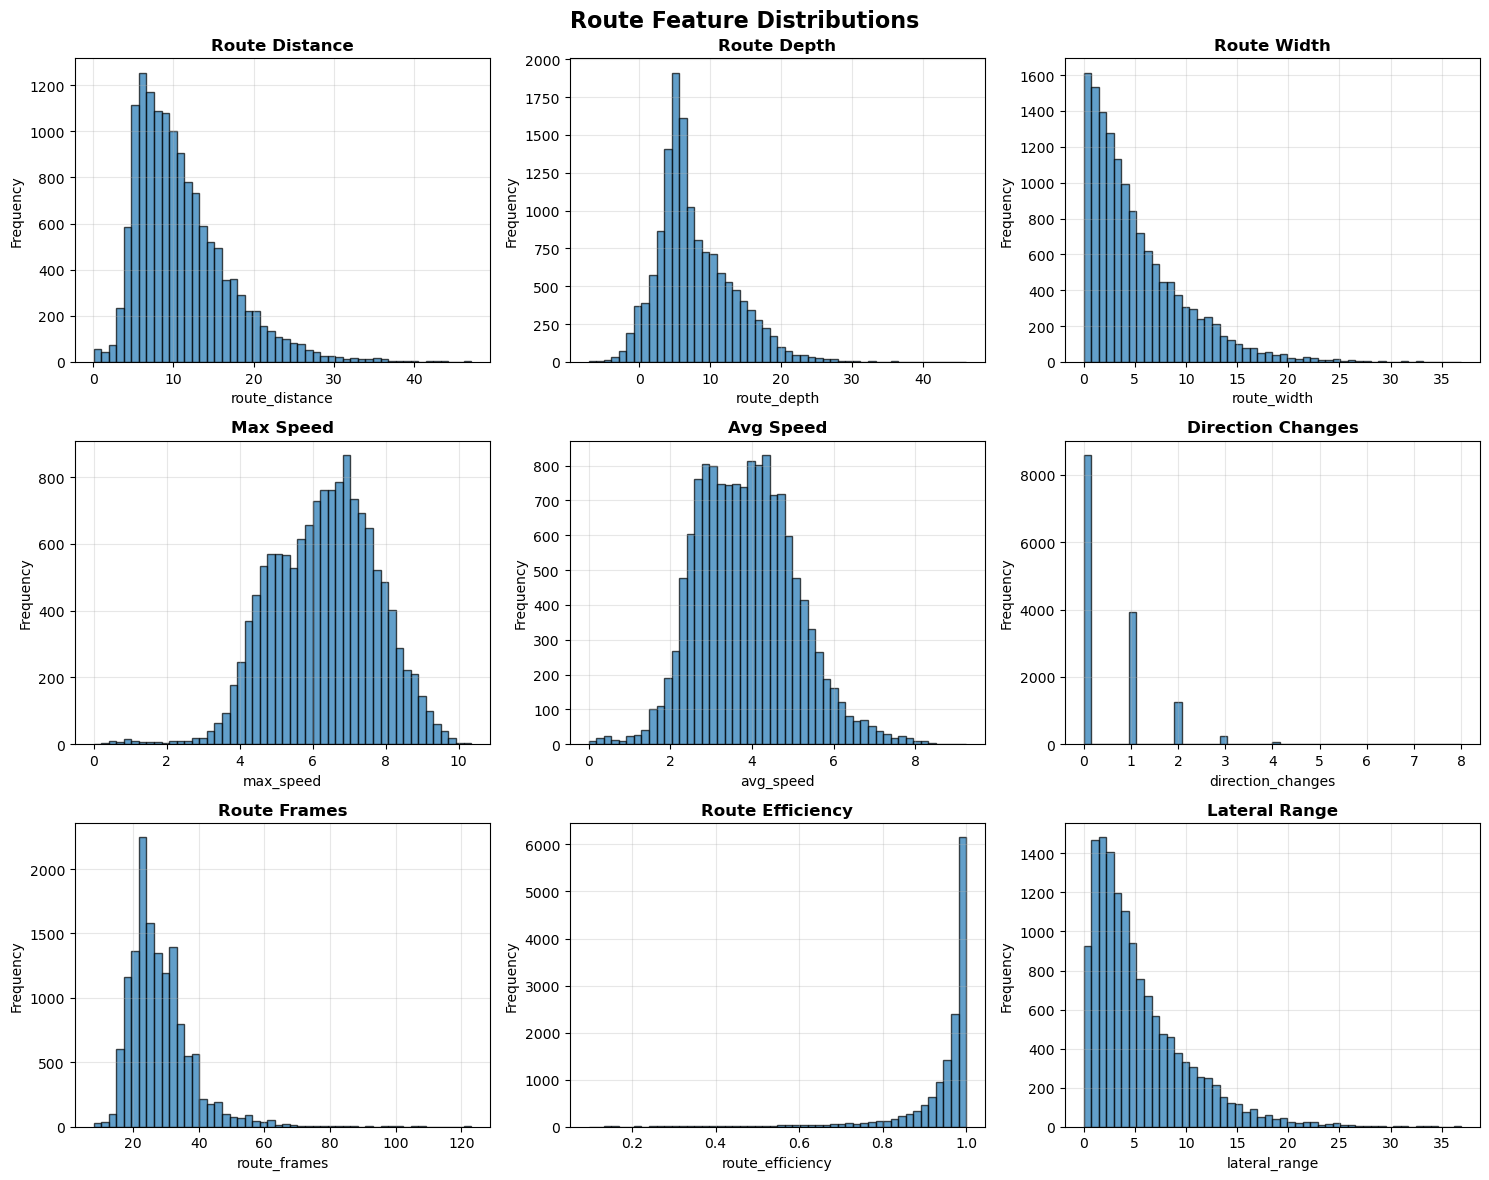

Feature distributions plotted!


In [105]:
# Visualize feature distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Route Feature Distributions', fontsize=16, fontweight='bold')

features_to_plot = [
    'route_distance', 'route_depth', 'route_width',
    'max_speed', 'avg_speed', 'direction_changes',
    'route_frames', 'route_efficiency', 'lateral_range'
]

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    wr_routes_df[feature].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Feature distributions plotted!")

#### Step 5: Analyze Features by Route Type

In [106]:
# Group by route type and analyze features
print("=" * 80)
print("ROUTE FEATURES BY ROUTE TYPE")
print("=" * 80)

# Top route types
top_routes = wr_routes_df['route_label'].value_counts().head(10).index.tolist()

# Filter to top routes
df_top_routes = wr_routes_df[wr_routes_df['route_label'].isin(top_routes)]

# Compare key features by route type
route_comparison = df_top_routes.groupby('route_label')[feature_cols].mean().round(2)
route_comparison = route_comparison.sort_values('route_depth', ascending=False)

print("\nAverage features by route type (top 10 routes):")
print(route_comparison)

print("\n" + "=" * 80)

ROUTE FEATURES BY ROUTE TYPE

Average features by route type (top 10 routes):
             route_distance  route_depth  route_width  max_speed  avg_speed  direction_changes  route_frames  route_efficiency
route_label                                                                                                                   
POST                  15.12        13.96         2.97       7.39       4.87               0.34         30.44              0.97
CORNER                15.33        13.90         3.09       7.45       4.82               0.37         31.86              0.95
GO                    12.97        11.16         4.74       7.45       4.49               0.44         28.37              0.98
IN                    13.13        10.59         3.91       6.32       4.14               0.53         30.97              0.91
OUT                   10.20         8.04         4.16       6.15       3.83               0.49         26.67              0.94
HITCH                  9.34      

#### Step 6: Optional - K-Means Clustering

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("Performing K-Means clustering on route features...")

# Select embedding features (exclude identifiers and outcomes)
embedding_cols = ['route_distance', 'route_depth', 'route_width', 'final_x', 'final_y',
                  'max_speed', 'avg_speed', 'speed_std', 'max_accel', 'avg_accel',
                  'direction_changes', 'route_frames', 'route_duration', 
                  'lateral_range', 'route_efficiency']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wr_routes_df[embedding_cols])

# K-Means clustering (k=12, based on common route types)
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
wr_routes_df['route_cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nClustering complete with {n_clusters} clusters!")
print(f"\nCluster distribution:")
print(wr_routes_df['route_cluster'].value_counts().sort_index())

Performing K-Means clustering on route features...

Clustering complete with 12 clusters!

Cluster distribution:
route_cluster
0     1772
1     1173
2      573
3      353
4     1461
5     1589
6     2062
7     1529
8      304
9      586
10    1037
11    1669
Name: count, dtype: int64


#### Step 7: Visualize Clusters with PCA

Creating PCA visualization...


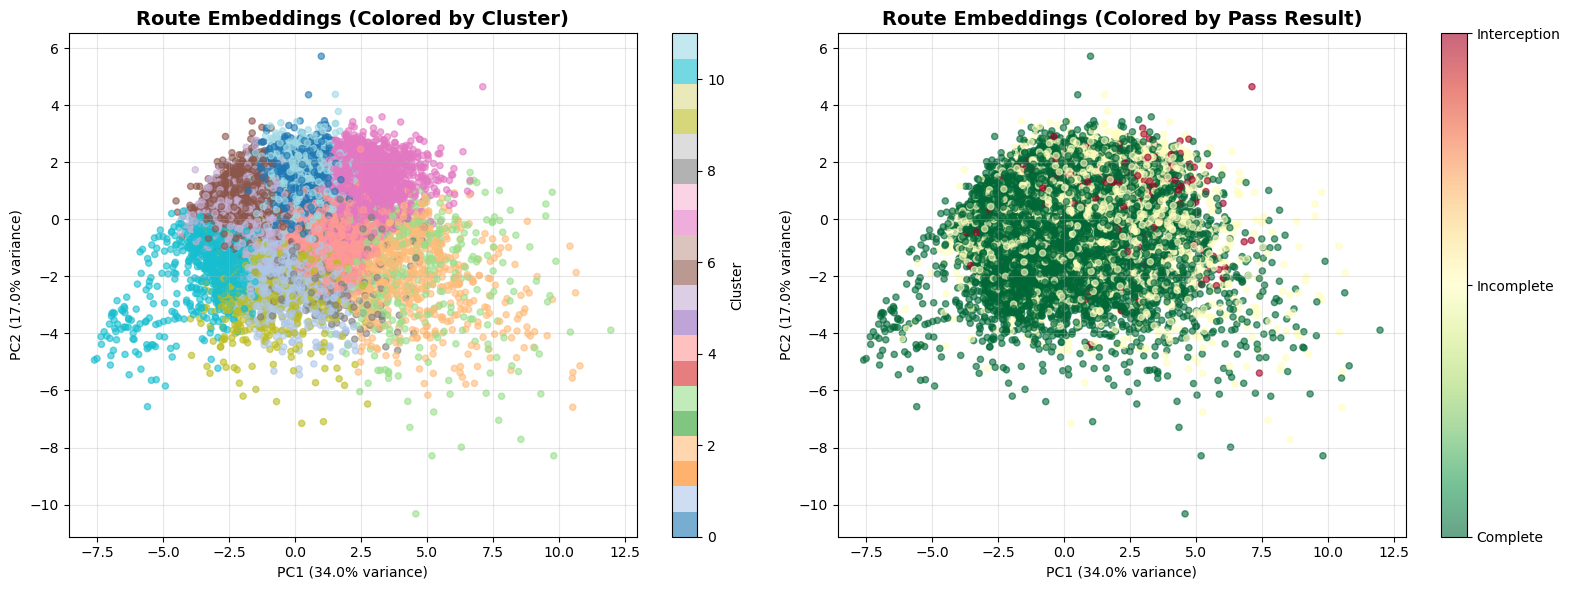


PCA explained variance: 51.0%


In [108]:
# PCA for visualization
print("Creating PCA visualization...")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Colored by cluster
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=wr_routes_df['route_cluster'], 
                          cmap='tab20', alpha=0.6, s=20)
axes[0].set_title('Route Embeddings (Colored by Cluster)', fontweight='bold', fontsize=14)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: Colored by pass result
pass_result_map = {'C': 0, 'I': 1, 'IN': 2}
wr_routes_df['pass_result_num'] = wr_routes_df['pass_result'].map(pass_result_map)

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=wr_routes_df['pass_result_num'], 
                          cmap='RdYlGn_r', alpha=0.6, s=20)
axes[1].set_title('Route Embeddings (Colored by Pass Result)', fontweight='bold', fontsize=14)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[1].grid(alpha=0.3)
cbar = plt.colorbar(scatter2, ax=axes[1])
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Complete', 'Incomplete', 'Interception'])

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

#### Step 8: Compare Clusters to Route Labels

In [109]:
# Cross-tabulation of clusters vs route labels
print("=" * 80)
print("CLUSTER vs ROUTE LABEL COMPARISON")
print("=" * 80)

# For each cluster, show top route labels
print("\nTop route types per cluster:")
for cluster_id in range(n_clusters):
    cluster_routes = wr_routes_df[wr_routes_df['route_cluster'] == cluster_id]
    top_routes_in_cluster = cluster_routes['route_label'].value_counts().head(3)
    
    print(f"\nCluster {cluster_id} (n={len(cluster_routes)}):")
    for route, count in top_routes_in_cluster.items():
        pct = count / len(cluster_routes) * 100
        print(f"  {route}: {count} ({pct:.1f}%)")

print("\n" + "=" * 80)

CLUSTER vs ROUTE LABEL COMPARISON

Top route types per cluster:

Cluster 0 (n=1772):
  OUT: 415 (23.4%)
  HITCH: 350 (19.8%)
  GO: 317 (17.9%)

Cluster 1 (n=1173):
  FLAT: 521 (44.4%)
  OUT: 187 (15.9%)
  HITCH: 118 (10.1%)

Cluster 2 (n=573):
  CROSS: 304 (53.1%)
  FLAT: 119 (20.8%)
  IN: 38 (6.6%)

Cluster 3 (n=353):
  HITCH: 89 (25.2%)
  IN: 71 (20.1%)
  OUT: 49 (13.9%)

Cluster 4 (n=1461):
  CROSS: 703 (48.1%)
  FLAT: 485 (33.2%)
  GO: 80 (5.5%)

Cluster 5 (n=1589):
  HITCH: 387 (24.4%)
  SLANT: 327 (20.6%)
  OUT: 294 (18.5%)

Cluster 6 (n=2062):
  HITCH: 667 (32.3%)
  SLANT: 429 (20.8%)
  OUT: 417 (20.2%)

Cluster 7 (n=1529):
  GO: 324 (21.2%)
  POST: 244 (16.0%)
  HITCH: 207 (13.5%)

Cluster 8 (n=304):
  FLAT: 103 (33.9%)
  CROSS: 79 (26.0%)
  SCREEN: 41 (13.5%)

Cluster 9 (n=586):
  FLAT: 157 (26.8%)
  HITCH: 112 (19.1%)
  OUT: 81 (13.8%)

Cluster 10 (n=1037):
  HITCH: 331 (31.9%)
  ANGLE: 179 (17.3%)
  SLANT: 150 (14.5%)

Cluster 11 (n=1669):
  OUT: 389 (23.3%)
  GO: 345 (20.7%

#### Step 9: Save Route Embeddings Table

In [110]:
# Rename embedding columns for clarity
embed_col_map = {
    'route_distance': 'route_embed_1',
    'route_depth': 'route_embed_2',
    'route_width': 'route_embed_3',
    'final_x': 'route_embed_4',
    'final_y': 'route_embed_5',
    'max_speed': 'route_embed_6',
    'avg_speed': 'route_embed_7',
    'speed_std': 'route_embed_8',
    'max_accel': 'route_embed_9',
    'avg_accel': 'route_embed_10',
    'direction_changes': 'route_embed_11',
    'route_frames': 'route_embed_12',
    'route_duration': 'route_embed_13',
    'lateral_range': 'route_embed_14',
    'route_efficiency': 'route_embed_15'
}

# Create final output table  
wr_routes_final = wr_routes_df.rename(columns=embed_col_map)

# Save to CSV
output_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\wr_routes_embeddings.csv"
wr_routes_final.to_csv(output_path, index=False)

print(f"Route embeddings saved to: {output_path}")
print(f"\nFinal table shape: {wr_routes_final.shape}")
print(f"\nColumns: {list(wr_routes_final.columns)}")
print(f"\nSample rows:")
wr_routes_final.head()

Route embeddings saved to: C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\wr_routes_embeddings.csv

Final table shape: (14108, 26)

Columns: ['game_id', 'play_id', 'nfl_id', 'player_name', 'player_position', 'route_embed_1', 'route_embed_2', 'route_embed_3', 'route_embed_4', 'route_embed_5', 'route_embed_6', 'route_embed_7', 'route_embed_8', 'route_embed_9', 'route_embed_10', 'route_embed_11', 'route_embed_12', 'route_embed_13', 'route_embed_14', 'route_embed_15', 'pass_result', 'route_label', 'yards_gained', 'expected_points_added', 'route_cluster', 'pass_result_num']

Sample rows:


,game_id,play_id,nfl_id,player_name,player_position,route_embed_1,route_embed_2,route_embed_3,route_embed_4,route_embed_5,route_embed_6,route_embed_7,route_embed_8,route_embed_9,route_embed_10,route_embed_11,route_embed_12,route_embed_13,route_embed_14,route_embed_15,pass_result,route_label,yards_gained,expected_points_added,route_cluster,pass_result_num
0,2023090700,101,44930,Josh Reynolds,WR,11.773586,11.40,1.97,52.43,14.14,7.90,4.611154,2.936111,5.56,2.975769,2,26,2.5,2.20,0.982620,I,CORNER,0,-2.145443,0,1
1,2023090700,194,41325,Jerick McKinnon,RB,8.491335,4.35,5.62,31.02,31.07,6.13,2.723750,2.350042,4.58,2.350938,1,32,3.1,5.70,0.836950,C,ANGLE,10,1.702563,1,0
2,2023090700,219,53591,Noah Gray,TE,4.620993,4.59,0.43,44.02,43.08,4.69,2.780000,1.812340,5.21,2.742941,1,17,1.6,0.43,0.997642,C,HITCH,5,0.089352,6,0
3,2023090700,361,38696,Marvin Jones,WR,17.888180,13.54,10.43,34.19,48.33,6.78,3.500980,2.358838,5.71,2.765490,1,51,5.0,10.45,0.955459,C,HITCH,5,-0.862062,3,0
4,2023090700,436,53541,Amon-Ra St. Brown,WR,4.892001,4.21,1.88,33.67,37.80,4.43,2.512000,1.666558,6.25,3.491500,2,20,1.9,2.05,0.942497,C,SLANT,13,1.613927,6,0


---

## Phase 1 Summary

✅ **Phase 1.1 Complete**: Filtered targeted receivers, normalized coordinates, calculated derived features

✅ **Phase 1.2 Complete**: Engineered 15 route features and performed K-Means clustering

**Output**:
- `wr_routes_embeddings.csv` with 14,108 routes
- 15-dimensional route embeddings (route_embed_1 through route_embed_15)
- 12 route clusters identified

**Next**: Phase 2 - Post-throw convergence modeling with LSTM

---

---

## Phase 1 Verification

### Manual Route Visualization

Plot sample routes on field diagrams to verify:
1. Coordinate normalization works correctly
2. Routes appear realistic
3. Different route types have distinct patterns

---

In [111]:
def plot_route_on_field(game_id, play_id, df_routes, title_suffix=""):
    """
    Plot a single WR route on a football field diagram.
    """
    # Get route data
    route = df_routes[(df_routes['game_id'] == game_id) & (df_routes['play_id'] == play_id)]
    
    if len(route) == 0:
        print(f"No route found for game {game_id}, play {play_id}")
        return
    
    route = route.sort_values('frame_id')
    
    # Create field
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Field boundaries
    ax.plot([0, 120], [0, 0], 'k-', linewidth=2)
    ax.plot([0, 120], [53.3, 53.3], 'k-', linewidth=2)
    ax.plot([0, 0], [0, 53.3], 'k-', linewidth=2)
    ax.plot([120, 120], [0, 53.3], 'k-', linewidth=2)
    
    # Yard lines every 10 yards
    for x in range(10, 120, 10):
        ax.plot([x, x], [0, 53.3], 'gray', linestyle='--', alpha=0.3, linewidth=1)
        ax.text(x, -2, str(x), ha='center', fontsize=9)
    
    # Sideline markers
    ax.axhline(y=26.65, color='gray', linestyle=':', alpha=0.5)
    
    # Plot route
    x_coords = route['x_norm'].values
    y_coords = route['y_norm'].values
    
    # Route line with gradient (time progression)
    for i in range(len(x_coords) - 1):
        alpha = (i + 1) / len(x_coords)  # Increase alpha over time
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], 'b-', linewidth=2, alpha=alpha)
    
    # Start and end points
    ax.scatter(x_coords[0], y_coords[0], color='green', s=200, marker='o', 
              edgecolors='black', linewidths=2, label='Start', zorder=5)
    ax.scatter(x_coords[-1], y_coords[-1], color='red', s=200, marker='X', 
              edgecolors='black', linewidths=2, label='End (Release)', zorder=5)
    
    # Ball landing location
    ball_x = route['ball_land_x'].iloc[0]
    ball_y = route['ball_land_y'].iloc[0]
    
    # Normalize ball landing coordinates if needed
    if route['play_direction'].iloc[0] == 'left':
        ball_x_norm = 120 - ball_x
        ball_y_norm = 53.3 - ball_y
    else:
        ball_x_norm = ball_x
        ball_y_norm = ball_y
    
    ax.scatter(ball_x_norm, ball_y_norm, color='orange', s=300, marker='*', 
              edgecolors='black', linewidths=2, label='Ball Landing', zorder=5)
    
    # Metadata
    player_name = route['player_name'].iloc[0]
    route_type = route['route_of_targeted_receiver'].iloc[0]
    pass_result = route['pass_result'].iloc[0]
    yards_gained = route['yards_gained'].iloc[0]
    
    # Title and labels
    title = f"Route: {player_name} | Type: {route_type} | Result: {pass_result} | Yards: {yards_gained:.0f}"
    if title_suffix:
        title += f" | {title_suffix}"
    
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_xlabel('Field Position (yards)', fontweight='bold')
    ax.set_ylabel('Field Width (yards)', fontweight='bold')
    ax.set_xlim(-5, 125)
    ax.set_ylim(-5, 58)
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

print("Route visualization function defined!")

Route visualization function defined!


#### Visualize Sample Routes by Type

Visualizing sample routes for manual verification...



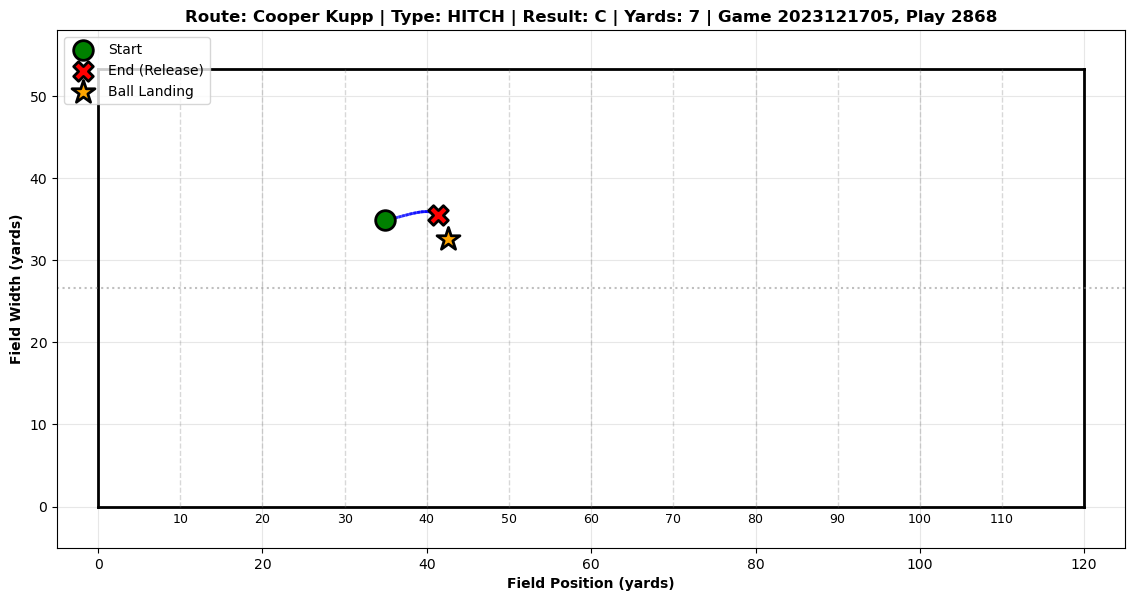

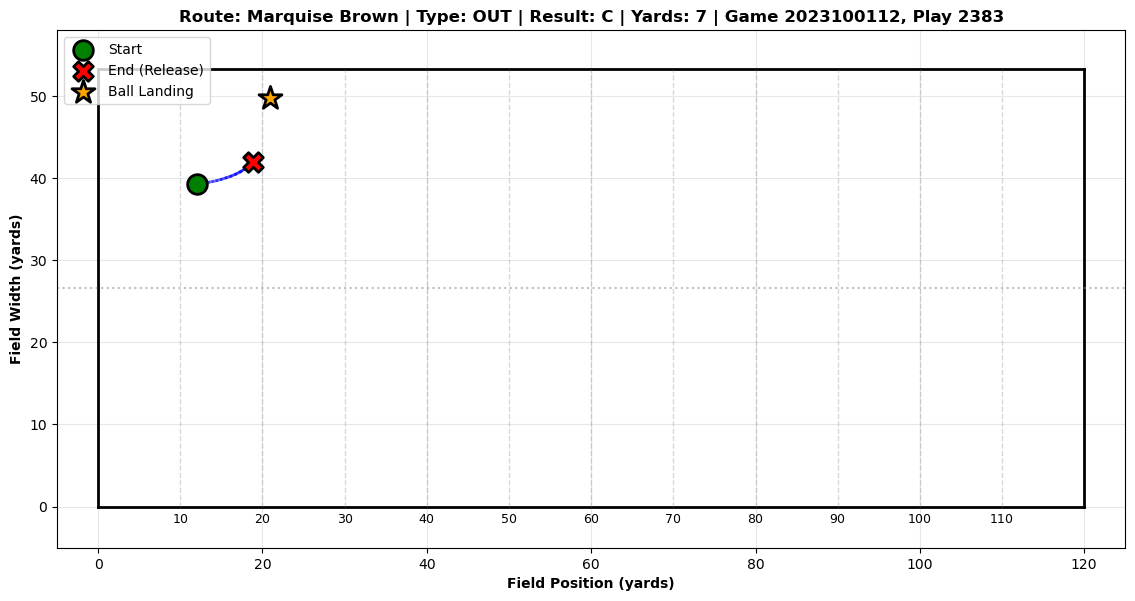

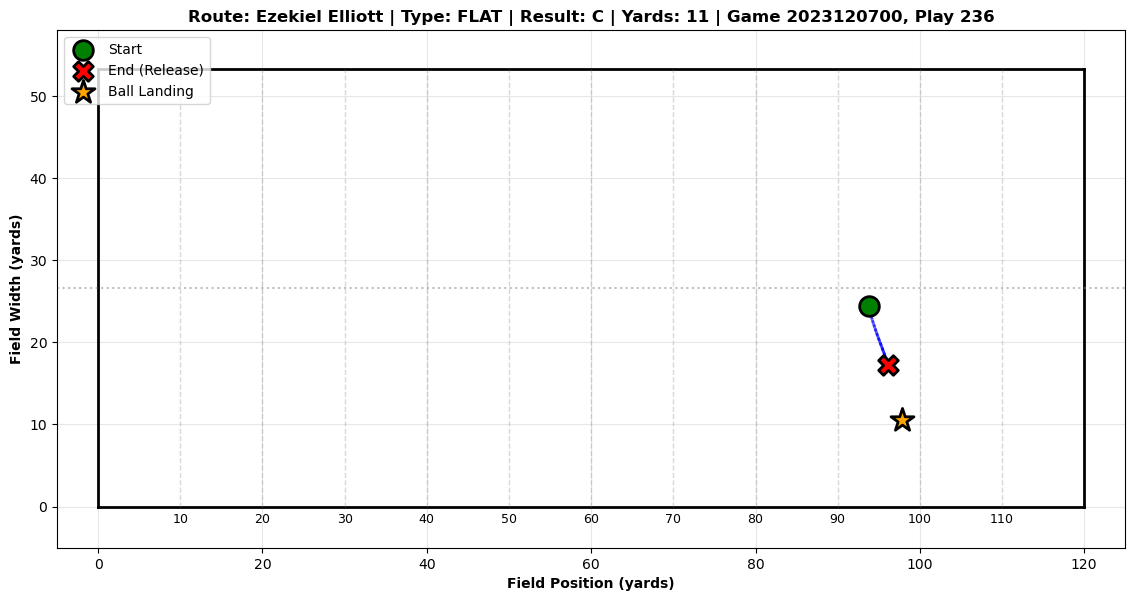

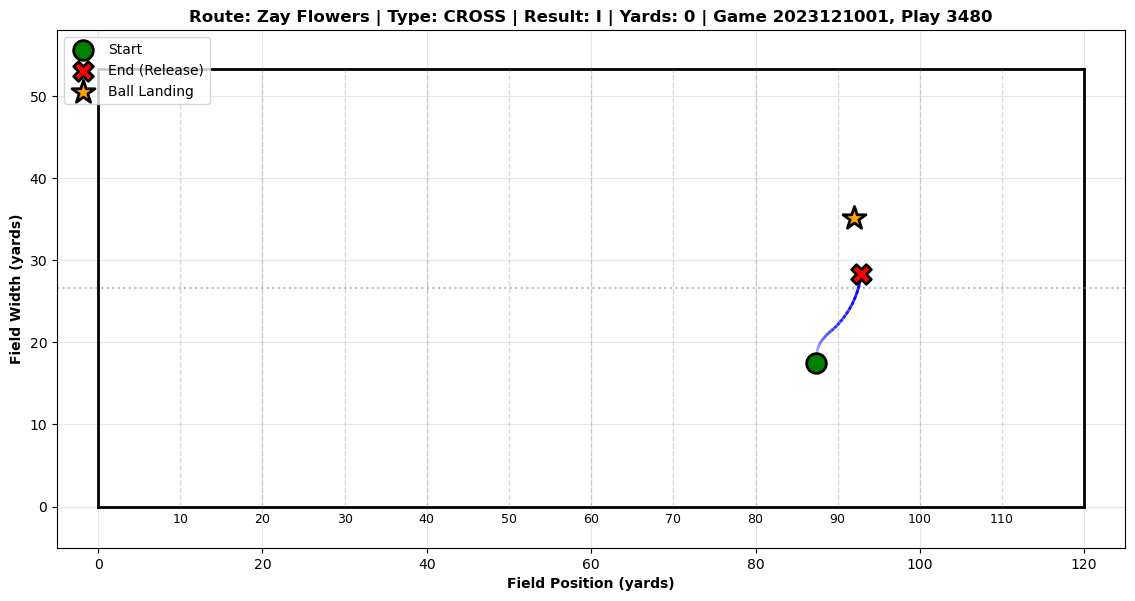

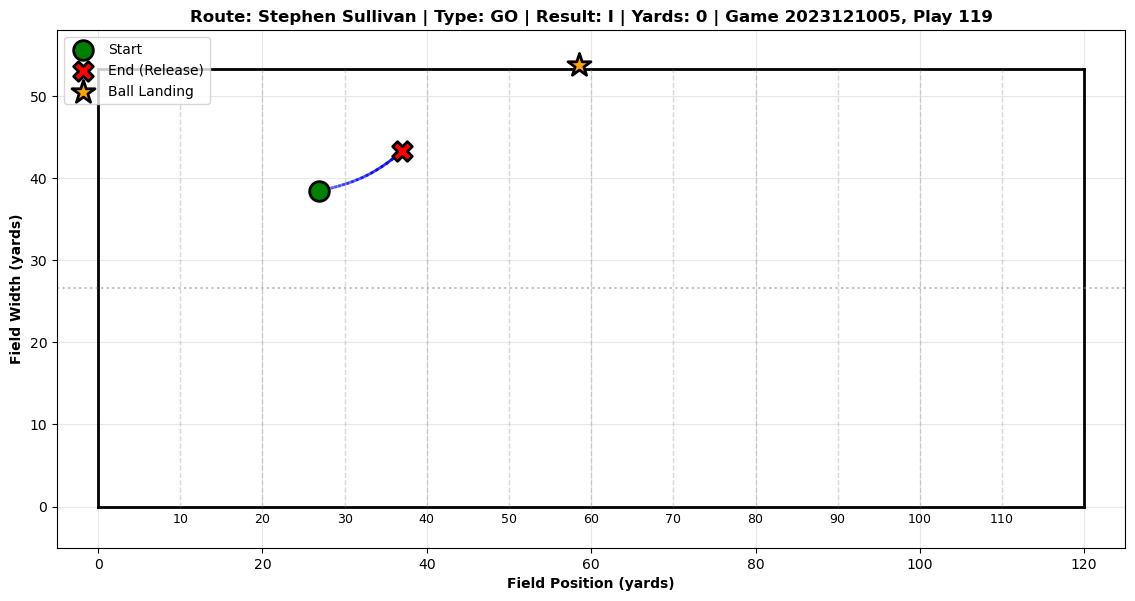


Plotted 5 sample routes for verification.


In [112]:
# Select representative routes for different route types
print("Visualizing sample routes for manual verification...\n")

# Get top route types
top_route_types = wr_routes_df['route_label'].value_counts().head(5).index.tolist()

# For each route type, pick one example
sample_routes = []
for route_type in top_route_types:
    # Get routes of this type
    routes_of_type = wr_routes_df[wr_routes_df['route_label'] == route_type]
    
    # Pick one with median depth (representative)
    median_depth = routes_of_type['route_depth'].median()  # route_depth
    closest_to_median = routes_of_type.iloc[(routes_of_type['route_depth'] - median_depth).abs().argsort().reset_index(drop=True)[0]]
    
    sample_routes.append({
        'game_id': closest_to_median['game_id'],
        'play_id': closest_to_median['play_id'],
        'route_type': route_type
    })

# Plot each sample route
for sample in sample_routes:
    plot_route_on_field(sample['game_id'], sample['play_id'], df_target_wr, 
                       title_suffix=f"Game {sample['game_id']}, Play {sample['play_id']}")

print(f"\nPlotted {len(sample_routes)} sample routes for verification.")

#### Visualize Routes by Cluster

Visualizing routes by cluster...



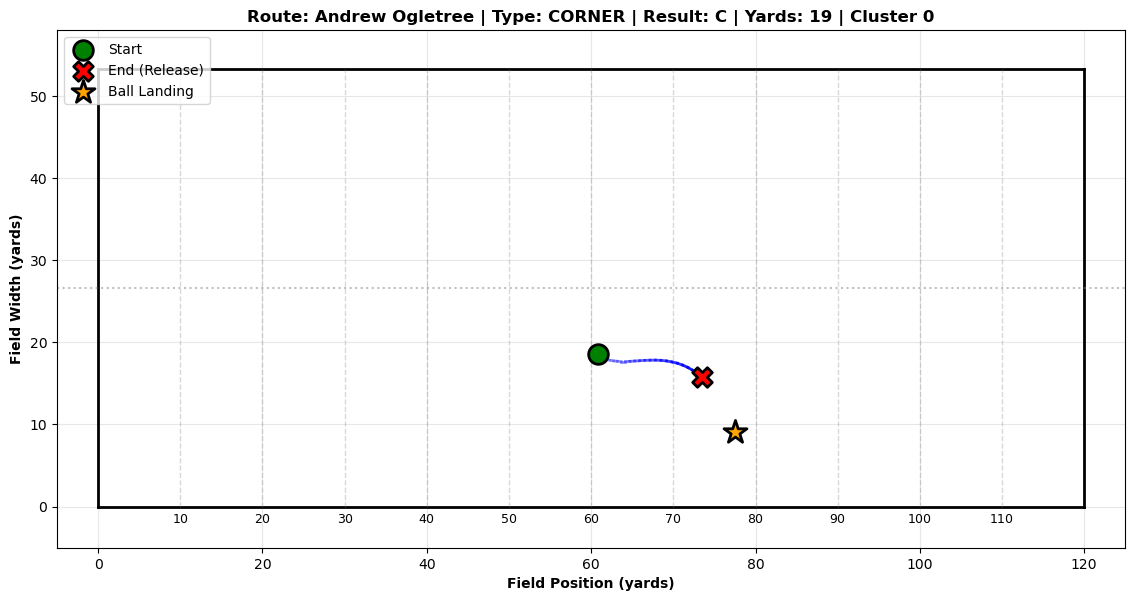

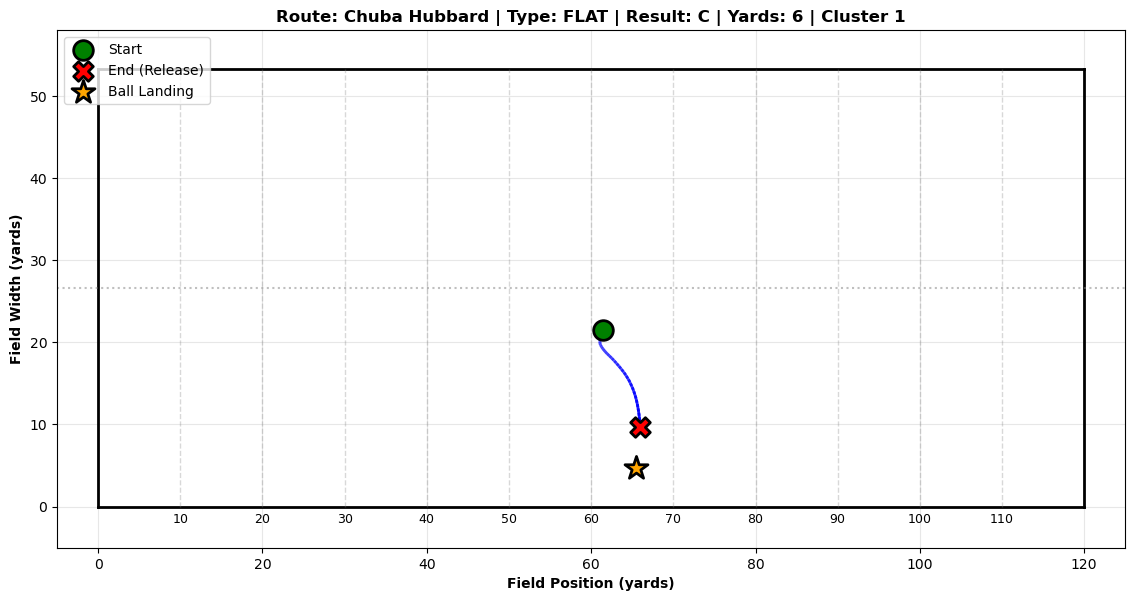

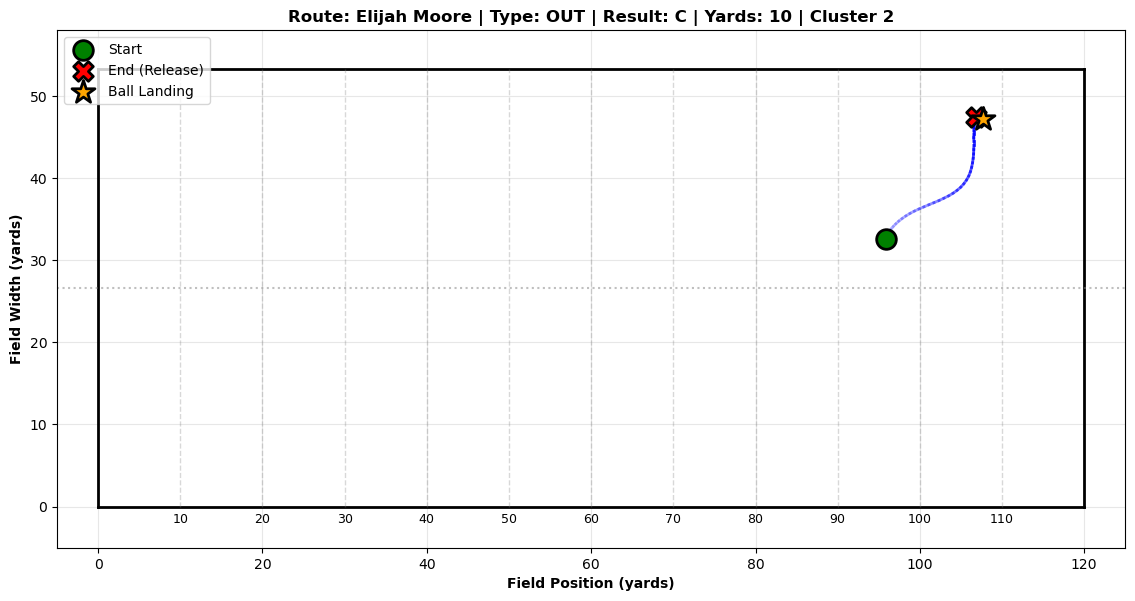

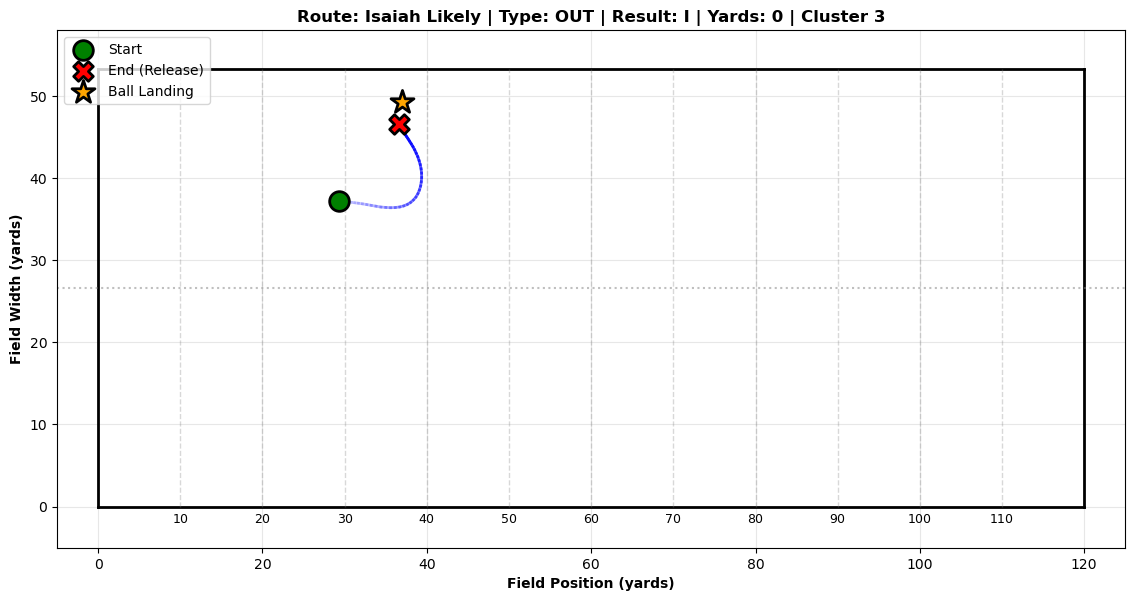

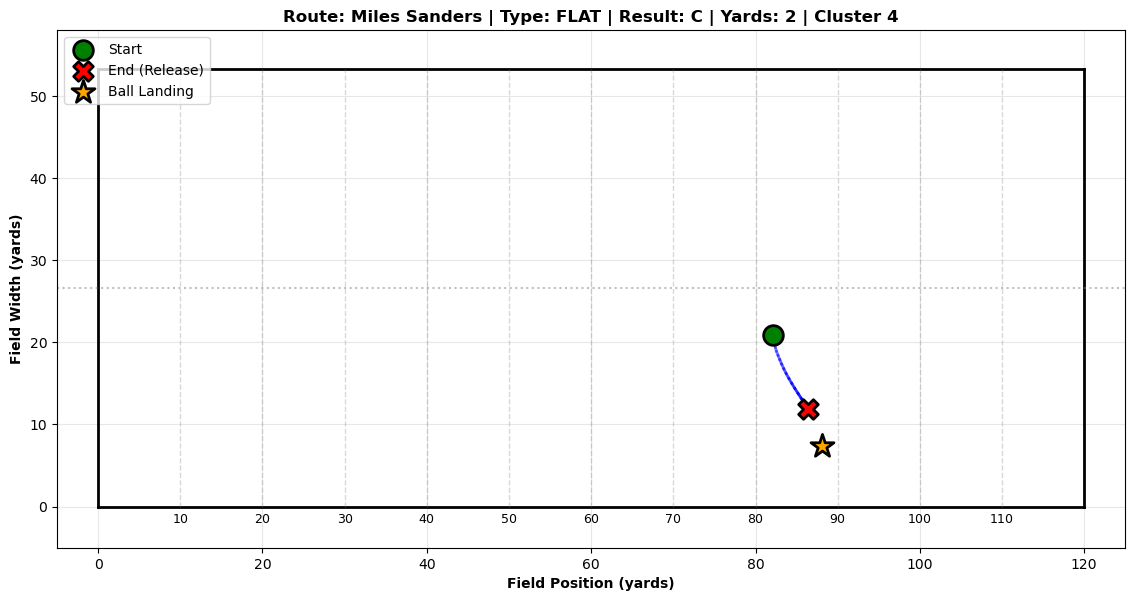

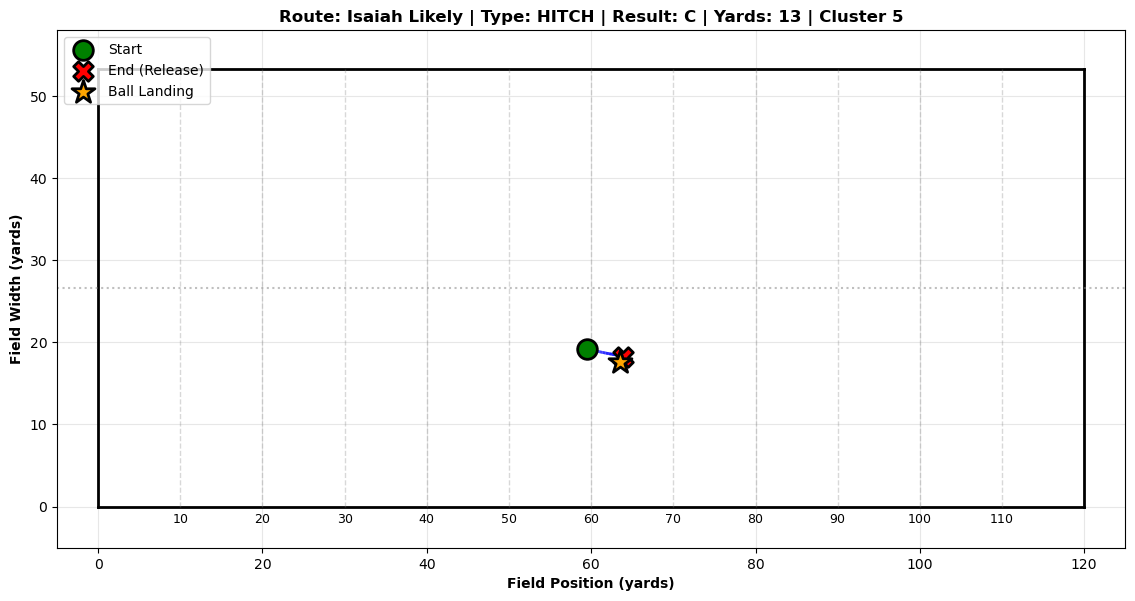


Plotted sample routes from first 6 clusters.


In [113]:
# Plot one representative route from each cluster
print("Visualizing routes by cluster...\n")

for cluster_id in range(min(6, n_clusters)):  # Show first 6 clusters
    cluster_routes = wr_routes_df[wr_routes_df['route_cluster'] == cluster_id]
    
    # Pick route closest to cluster centroid (median of all features)
    # For simplicity, use the route with median depth in this cluster
    median_route = cluster_routes.iloc[len(cluster_routes) // 2]
    
    plot_route_on_field(median_route['game_id'], median_route['play_id'], df_target_wr,
                       title_suffix=f"Cluster {cluster_id}")

print(f"\nPlotted sample routes from first 6 clusters.")

#### Data Integrity Verification

In [114]:
# Automated verification checks
print("=" * 80)
print("AUTOMATED VERIFICATION CHECKS")
print("=" * 80)

# Check 1: One route per play
plays_per_route = wr_routes_final.groupby(['game_id', 'play_id']).size()
assert all(plays_per_route == 1), "ERROR: Multiple routes per play!"
print("✓ Check 1: One route per play - PASSED")

# Check 2: Expected number of routes
expected_routes = df_input[df_input['player_role'] == 'Targeted Receiver'].groupby(['game_id', 'play_id']).ngroups
assert len(wr_routes_final) == expected_routes, f"ERROR: Expected {expected_routes} routes, got {len(wr_routes_final)}"
print(f"✓ Check 2: Expected {expected_routes} routes - PASSED")

# Check 3: No NaN embeddings
embed_cols = [col for col in wr_routes_final.columns if col.startswith('route_embed_')]
assert wr_routes_final[embed_cols].notna().all().all(), "ERROR: NaN values in embeddings!"
print(f"✓ Check 3: No NaN embeddings ({len(embed_cols)} features) - PASSED")

# Check 4: Reasonable feature ranges
assert (wr_routes_final['route_embed_2'] >= -20).all(), "ERROR: Route depth too negative!"  # route_depth
assert (wr_routes_final['route_embed_2'] <= 80).all(), "ERROR: Route depth too large!"  # route_depth
print("✓ Check 4: Reasonable feature ranges - PASSED")

# Check 5: All clusters assigned
assert wr_routes_final['route_cluster'].notna().all(), "ERROR: Unassigned clusters!"
assert wr_routes_final['route_cluster'].between(0, n_clusters-1).all(), "ERROR: Invalid cluster IDs!"
print(f"✓ Check 5: All routes assigned to {n_clusters} clusters - PASSED")

print("\n" + "=" * 80)
print("ALL AUTOMATED CHECKS PASSED!")
print("=" * 80)

AUTOMATED VERIFICATION CHECKS
✓ Check 1: One route per play - PASSED
✓ Check 2: Expected 14108 routes - PASSED
✓ Check 3: No NaN embeddings (15 features) - PASSED
✓ Check 4: Reasonable feature ranges - PASSED
✓ Check 5: All routes assigned to 12 clusters - PASSED

ALL AUTOMATED CHECKS PASSED!


---

## ✅ Phase 1 Complete!

**Summary**:
- Processed 14,108 targeted receiver routes
- Created 15-dimensional route embeddings using engineered features
- Performed K-Means clustering (12 clusters)
- Saved to `wr_routes_embeddings.csv`

**Route Embedding Features**:
1. route_embed_1: Total route distance
2. route_embed_2: Route depth (forward gain)
3. route_embed_3: Route width (lateral movement)
4. route_embed_4: Final X position
5. route_embed_5: Final Y position
6. route_embed_6: Max speed
7. route_embed_7: Average speed
8. route_embed_8: Speed std deviation
9. route_embed_9: Max acceleration
10. route_embed_10: Average acceleration
11. route_embed_11: Direction changes
12. route_embed_12: Route frames
13. route_embed_13: Route duration
14. route_embed_14: Lateral range
15. route_embed_15: Route efficiency

**Ready for Phase 2**: Post-throw convergence modeling

---

---

## Phase 2: Post-Throw Convergence Modeling (LSTM)

### 2.1 Construct Post-Throw Sequences

**Goal**: Extract targeted receiver trajectories after ball release and calculate convergence features.

**Key metrics**:
- Distance to ball landing location
- Convergence rate (how fast approaching target)
- Heading alignment (movement direction toward ball)

---

#### Step 1: Load Post-Throw Data and Route Embeddings

In [115]:
# Load route embeddings from Phase 1
print("Loading route embeddings from Phase 1...")
routes_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\wr_routes_embeddings.csv"
wr_routes_df = pd.read_csv(routes_path)

print(f"Route embeddings loaded: {wr_routes_df.shape}")
print(f"\nColumns: {list(wr_routes_df.columns[:10])}...")  # Show first 10 columns

Loading route embeddings from Phase 1...
Route embeddings loaded: (14108, 26)

Columns: ['game_id', 'play_id', 'nfl_id', 'player_name', 'player_position', 'route_embed_1', 'route_embed_2', 'route_embed_3', 'route_embed_4', 'route_embed_5']...


In [116]:
# Filter output data to targeted receivers only
print("Filtering post-throw data to targeted receivers...")

# Get list of (game_id, play_id, nfl_id) for targeted receivers
target_receivers = wr_routes_df[['game_id', 'play_id', 'nfl_id']].copy()

# Merge with output data to get only targeted receivers
df_postthrow = df_output.merge(target_receivers, on=['game_id', 'play_id', 'nfl_id'], how='inner')

print(f"\nPost-throw data (targeted WRs only): {df_postthrow.shape}")
print(f"Unique plays: {df_postthrow.groupby(['game_id', 'play_id']).ngroups}")
print(f"Unique players: {df_postthrow['nfl_id'].nunique()}")

Filtering post-throw data to targeted receivers...

Post-throw data (targeted WRs only): (160360, 6)
Unique plays: 14108
Unique players: 464


#### Step 2: Get Ball Landing Coordinates and Play Direction

In [117]:
# Extract ball landing coordinates and play direction from input data
print("Extracting ball landing coordinates and play direction...")

# Get unique values per play from input data
ball_info = df_input[df_input['player_role'] == 'Targeted Receiver'].groupby(['game_id', 'play_id']).first()[
    ['ball_land_x', 'ball_land_y', 'play_direction']
].reset_index()

# Merge with post-throw data
df_postthrow = df_postthrow.merge(ball_info, on=['game_id', 'play_id'], how='left')

print(f"\nBall landing info merged!")
print(f"Sample:\n{df_postthrow[['game_id', 'play_id', 'x', 'y', 'ball_land_x', 'ball_land_y', 'play_direction']].head()}")

Extracting ball landing coordinates and play direction...

Ball landing info merged!
Sample:
      game_id  play_id      x      y  ball_land_x  ball_land_y play_direction
0  2023090700      101  53.20  13.98    63.259998        -0.22          right
1  2023090700      101  53.96  13.78    63.259998        -0.22          right
2  2023090700      101  54.70  13.54    63.259998        -0.22          right
3  2023090700      101  55.41  13.27    63.259998        -0.22          right
4  2023090700      101  56.09  12.95    63.259998        -0.22          right


#### Step 3: Normalize Coordinates (Same as Phase 1)

In [118]:
# Normalize coordinates to field-oriented system (offense left to right)
print("Normalizing post-throw coordinates...")

# Apply same normalization as Phase 1
df_postthrow['x_norm'] = df_postthrow['x']
df_postthrow['y_norm'] = df_postthrow['y']
df_postthrow['ball_land_x_norm'] = df_postthrow['ball_land_x']
df_postthrow['ball_land_y_norm'] = df_postthrow['ball_land_y']

# Flip for plays going left
left_mask = df_postthrow['play_direction'] == 'left'

df_postthrow.loc[left_mask, 'x_norm'] = 120 - df_postthrow.loc[left_mask, 'x']
df_postthrow.loc[left_mask, 'y_norm'] = 53.3 - df_postthrow.loc[left_mask, 'y']
df_postthrow.loc[left_mask, 'ball_land_x_norm'] = 120 - df_postthrow.loc[left_mask, 'ball_land_x']
df_postthrow.loc[left_mask, 'ball_land_y_norm'] = 53.3 - df_postthrow.loc[left_mask, 'ball_land_y']

print("Normalization complete!")
print(f"\nSample normalized coordinates:")
print(df_postthrow[['x', 'x_norm', 'y', 'y_norm', 'play_direction']].head())

Normalizing post-throw coordinates...
Normalization complete!

Sample normalized coordinates:
       x  x_norm      y  y_norm play_direction
0  53.20   53.20  13.98   13.98          right
1  53.96   53.96  13.78   13.78          right
2  54.70   54.70  13.54   13.54          right
3  55.41   55.41  13.27   13.27          right
4  56.09   56.09  12.95   12.95          right


#### Step 4: Calculate Geometry Features

**Features to compute**:
1. `dx`, `dy` - Frame-to-frame displacement
2. `speed` - Velocity magnitude
3. `dist_to_land` - Euclidean distance to ball landing location
4. `bearing_to_land` - Angle from current position to ball (radians)
5. `heading` - Direction of movement (radians)
6. `heading_align_cos` - Cosine of alignment between movement and target (1.0 = perfect, -1.0 = opposite)
7. `time_since_throw` - Time elapsed since ball release
8. `frame_since_throw` - Frames elapsed since ball release

In [119]:
# Calculate geometry features
print("Calculating geometry features...")

# Sort by play and frame
df_postthrow = df_postthrow.sort_values(['game_id', 'play_id', 'frame_id']).reset_index(drop=True)

# 1. Displacement
df_postthrow['dx'] = df_postthrow.groupby(['game_id', 'play_id'])['x_norm'].diff().fillna(0)
df_postthrow['dy'] = df_postthrow.groupby(['game_id', 'play_id'])['y_norm'].diff().fillna(0)

# 2. Speed (yards per second)
df_postthrow['speed'] = np.sqrt(df_postthrow['dx']**2 + df_postthrow['dy']**2) / 0.1

# 3. Distance to landing
df_postthrow['dist_to_land'] = np.sqrt(
    (df_postthrow['x_norm'] - df_postthrow['ball_land_x_norm'])**2 + 
    (df_postthrow['y_norm'] - df_postthrow['ball_land_y_norm'])**2
)

# 4. Bearing to landing (angle from player to ball, in radians)
df_postthrow['bearing_to_land'] = np.arctan2(
    df_postthrow['ball_land_y_norm'] - df_postthrow['y_norm'],
    df_postthrow['ball_land_x_norm'] - df_postthrow['x_norm']
)

# 5. Heading (movement direction, in radians)
df_postthrow['heading'] = np.arctan2(df_postthrow['dy'], df_postthrow['dx'])

# 6. Heading alignment (cosine of angle between heading and bearing)
# heading_align_cos = 1.0 means moving directly toward target
# heading_align_cos = -1.0 means moving directly away
heading_error = df_postthrow['bearing_to_land'] - df_postthrow['heading']
df_postthrow['heading_align_cos'] = np.cos(heading_error)

# 7. Temporal features
df_postthrow['frame_since_throw'] = df_postthrow.groupby(['game_id', 'play_id']).cumcount()
df_postthrow['time_since_throw'] = df_postthrow['frame_since_throw'] * 0.1

print("Geometry features calculated!")
print(f"\nNew columns: dx, dy, speed, dist_to_land, bearing_to_land, heading, heading_align_cos")
print(f"\nSample:")
print(df_postthrow[['frame_id', 'x_norm', 'y_norm', 'dx', 'dy', 'speed', 'dist_to_land', 'heading_align_cos']].head(10))

Calculating geometry features...
Geometry features calculated!

New columns: dx, dy, speed, dist_to_land, bearing_to_land, heading, heading_align_cos

Sample:
   frame_id  x_norm  y_norm    dx    dy     speed  dist_to_land  heading_align_cos
0         1   53.20   13.98  0.00  0.00  0.000000     17.402401           0.578081
1         2   53.96   13.78  0.76 -0.20  7.858753     16.807438           0.747092
2         3   54.70   13.54  0.74 -0.24  7.779460     16.205282           0.764411
3         4   55.41   13.27  0.71 -0.27  7.596052     15.607773           0.777328
4         5   56.09   12.95  0.68 -0.32  7.515318     14.995258           0.806608
5         6   56.73   12.58  0.64 -0.37  7.392564     14.369443           0.839259
6         7   57.35   12.14  0.62 -0.44  7.602631     13.700280           0.873921
7         8   57.92   11.68  0.57 -0.46  7.324616     13.043220           0.891575
8         9   58.45   11.17  0.53 -0.51  7.355270     12.363987           0.919085
9        10

#### Step 5: Calculate Initial Separation (Context Feature)

Distance from targeted WR to ball landing at the moment of throw (frame 1).

In [120]:
# Calculate initial separation (distance at throw)
print("Calculating initial separation...")

# Get distance at frame 1 for each play
initial_sep = df_postthrow[df_postthrow['frame_id'] == 1].groupby(['game_id', 'play_id'])['dist_to_land'].first().reset_index()
initial_sep.columns = ['game_id', 'play_id', 'initial_separation']

# Merge back
df_postthrow = df_postthrow.merge(initial_sep, on=['game_id', 'play_id'], how='left')

print(f"Initial separation calculated!")
print(f"Mean initial separation: {df_postthrow['initial_separation'].mean():.2f} yards")
print(f"Median: {df_postthrow['initial_separation'].median():.2f} yards")

Calculating initial separation...
Initial separation calculated!
Mean initial separation: 8.44 yards
Median: 6.10 yards


#### Step 6: Merge Route Embeddings from Phase 1

In [121]:
# Merge route embeddings
print("Merging route embeddings from Phase 1...")

# Select route embedding columns
embed_cols = ['game_id', 'play_id'] + [col for col in wr_routes_df.columns if col.startswith('route_embed_')]
route_embeds = wr_routes_df[embed_cols].copy()

# Merge
df_postthrow = df_postthrow.merge(route_embeds, on=['game_id', 'play_id'], how='left')

print(f"Route embeddings merged!")
print(f"Added {len([col for col in df_postthrow.columns if col.startswith('route_embed_')])} route embedding features")
print(f"\nTotal columns: {len(df_postthrow.columns)}")

Merging route embeddings from Phase 1...
Route embeddings merged!
Added 15 route embedding features

Total columns: 38


#### Step 7: Data Quality Check

In [122]:
# Data quality checks
print("=" * 80)
print("POST-THROW DATA QUALITY CHECKS")
print("=" * 80)

print(f"\n1. Missing values:")
key_cols = ['x_norm', 'y_norm', 'dist_to_land', 'heading_align_cos', 'initial_separation']
missing = df_postthrow[key_cols].isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "  No missing values!")

print(f"\n2. Frame count per play:")
frames_per_play = df_postthrow.groupby(['game_id', 'play_id'])['frame_id'].count()
print(f"  Mean: {frames_per_play.mean():.1f}")
print(f"  Median: {frames_per_play.median():.0f}")
print(f"  90th percentile: {frames_per_play.quantile(0.90):.0f}")
print(f"  95th percentile: {frames_per_play.quantile(0.95):.0f}")
print(f"  Max: {frames_per_play.max()}")

print(f"\n3. Feature ranges:")
print(f"  dist_to_land: {df_postthrow['dist_to_land'].min():.2f} to {df_postthrow['dist_to_land'].max():.2f} yards")
print(f"  speed: {df_postthrow['speed'].min():.2f} to {df_postthrow['speed'].max():.2f} yds/s")
print(f"  heading_align_cos: {df_postthrow['heading_align_cos'].min():.2f} to {df_postthrow['heading_align_cos'].max():.2f}")

print("\n" + "=" * 80)

POST-THROW DATA QUALITY CHECKS

1. Missing values:
  No missing values!

2. Frame count per play:
  Mean: 11.4
  Median: 10
  90th percentile: 19
  95th percentile: 23
  Max: 94

3. Feature ranges:
  dist_to_land: 0.00 to 50.98 yards
  speed: 0.00 to 14.14 yds/s
  heading_align_cos: -1.00 to 1.00



---

### 2.2 Define Convergence Rate and Build Sequences

**Convergence Rate**: Rate at which player is closing distance to ball landing location.

$$\text{converge\_rate}[t] = \text{dist\_to\_land}[t] - \text{dist\_to\_land}[t+1]$$

- `converge_rate > 0`: Moving closer (good!)
- `converge_rate = 0`: No net progress
- `converge_rate < 0`: Moving away (bad!)

---

#### Step 1: Calculate Convergence Rate

In [123]:
# Calculate convergence rate
print("Calculating convergence rate...")

# converge_rate[t] = dist_to_land[t] - dist_to_land[t+1]
# Positive = getting closer, Negative = moving away
df_postthrow['dist_to_land_next'] = df_postthrow.groupby(['game_id', 'play_id'])['dist_to_land'].shift(-1)
df_postthrow['converge_rate'] = df_postthrow['dist_to_land'] - df_postthrow['dist_to_land_next']

# Fill last frame with 0 (no next frame)
df_postthrow['converge_rate'] = df_postthrow['converge_rate'].fillna(0)

print("Convergence rate calculated!")
print(f"\nStatistics:")
print(f"  Mean: {df_postthrow['converge_rate'].mean():.3f} yards/frame")
print(f"  Median: {df_postthrow['converge_rate'].median():.3f} yards/frame")
print(f"  Std: {df_postthrow['converge_rate'].std():.3f}")
print(f"\nDistribution:")
print(f"  Converging (>0): {(df_postthrow['converge_rate'] > 0).sum()} frames ({(df_postthrow['converge_rate'] > 0).mean()*100:.1f}%)")
print(f"  Neutral (=0): {(df_postthrow['converge_rate'] == 0).sum()} frames")
print(f"  Diverging (<0): {(df_postthrow['converge_rate'] < 0).sum()} frames ({(df_postthrow['converge_rate'] < 0).mean()*100:.1f}%)")

Calculating convergence rate...
Convergence rate calculated!

Statistics:
  Mean: 0.414 yards/frame
  Median: 0.492 yards/frame
  Std: 0.352

Distribution:
  Converging (>0): 127811 frames (79.7%)
  Neutral (=0): 14125 frames
  Diverging (<0): 18424 frames (11.5%)


#### Step 2: Visualize Convergence Rate Distribution

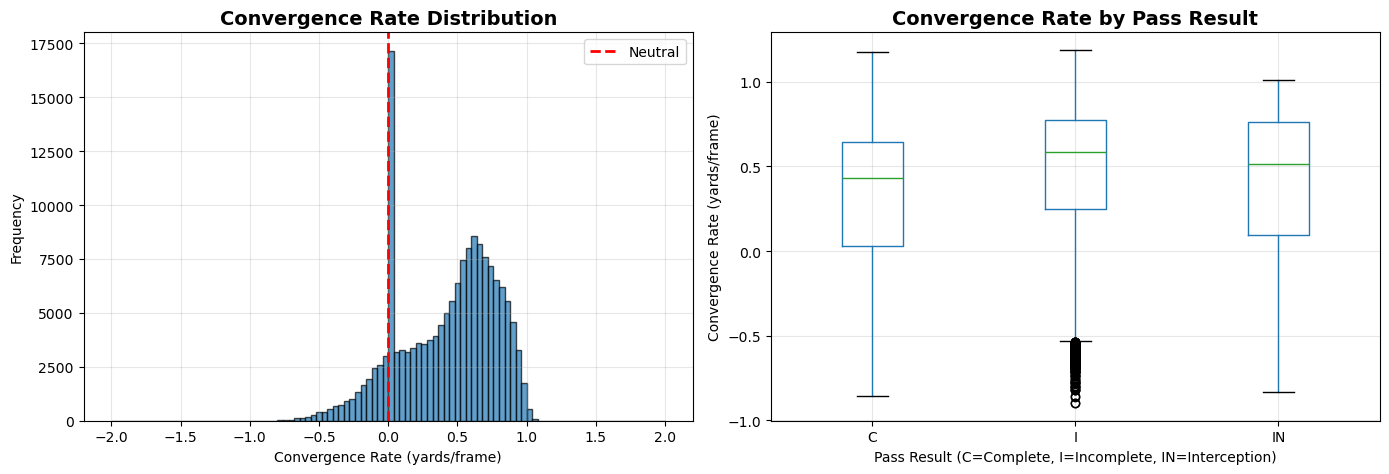

Convergence rate visualized!


In [124]:
# Visualize convergence rate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_postthrow['converge_rate'], bins=100, edgecolor='black', alpha=0.7, range=(-2, 2))
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
axes[0].set_title('Convergence Rate Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Convergence Rate (yards/frame)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot by pass result
df_with_result = df_postthrow.merge(
    wr_routes_df[['game_id', 'play_id', 'pass_result']], 
    on=['game_id', 'play_id'], 
    how='left'
)
df_with_result.boxplot(column='converge_rate', by='pass_result', ax=axes[1])
axes[1].set_title('Convergence Rate by Pass Result', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Pass Result (C=Complete, I=Incomplete, IN=Interception)')
axes[1].set_ylabel('Convergence Rate (yards/frame)')
axes[1].grid(alpha=0.3)
plt.suptitle('')  # Remove auto-generated title

plt.tight_layout()
plt.show()

print("Convergence rate visualized!")

#### Step 3: Define Sequence Parameters

In [125]:
# Define sequence parameters
print("Defining sequence parameters...")

# Max sequence length (95th percentile + buffer)
T_air = 25

# Feature columns for LSTM input
feature_cols = [
    # Position
    'x_norm', 'y_norm',
    # Motion
    'dx', 'dy', 'speed',
    # Geometry
    'dist_to_land', 'bearing_to_land', 'heading', 'heading_align_cos',
    # Temporal
    'time_since_throw',
    # Context (constant per play)
    'initial_separation', 'ball_land_x_norm', 'ball_land_y_norm'
] + [col for col in df_postthrow.columns if col.startswith('route_embed_')]  # 15 route embeddings

n_features = len(feature_cols)

print(f"\nSequence parameters:")
print(f"  T_air (max sequence length): {T_air} frames")
print(f"  Number of features: {n_features}")
print(f"\nFeature columns ({n_features}):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

Defining sequence parameters...

Sequence parameters:
  T_air (max sequence length): 25 frames
  Number of features: 28

Feature columns (28):
   1. x_norm
   2. y_norm
   3. dx
   4. dy
   5. speed
   6. dist_to_land
   7. bearing_to_land
   8. heading
   9. heading_align_cos
  10. time_since_throw
  11. initial_separation
  12. ball_land_x_norm
  13. ball_land_y_norm
  14. route_embed_1
  15. route_embed_2
  16. route_embed_3
  17. route_embed_4
  18. route_embed_5
  19. route_embed_6
  20. route_embed_7
  21. route_embed_8
  22. route_embed_9
  23. route_embed_10
  24. route_embed_11
  25. route_embed_12
  26. route_embed_13
  27. route_embed_14
  28. route_embed_15


#### Step 4: Build Sequence Arrays for LSTM

In [126]:
# Build sequences
print("Building LSTM sequences...")

def build_sequences(df, feature_cols, target_col, max_len=25):
    """
    Build padded sequences for LSTM.
    
    Returns:
    - X_seq: (n_plays, max_len, n_features)
    - y_seq: (n_plays, max_len, 1)
    - play_ids: List of (game_id, play_id) tuples
    """
    X_list = []
    y_list = []
    play_ids = []
    
    for (game_id, play_id), group in df.groupby(['game_id', 'play_id']):
        # Sort by frame
        group = group.sort_values('frame_id').reset_index(drop=True)
        
        # Extract features and target
        X = group[feature_cols].values  # Shape: (n_frames, n_features)
        y = group[target_col].values.reshape(-1, 1)  # Shape: (n_frames, 1)
        
        # Get sequence length
        seq_len = len(X)
        
        # Pad or truncate
        if seq_len < max_len:
            # Pad with zeros
            X_padded = np.zeros((max_len, X.shape[1]))
            X_padded[:seq_len] = X
            
            y_padded = np.zeros((max_len, 1))
            y_padded[:seq_len] = y
        else:
            # Truncate
            X_padded = X[:max_len]
            y_padded = y[:max_len]
        
        X_list.append(X_padded)
        y_list.append(y_padded)
        play_ids.append((game_id, play_id))
    
    X_seq = np.array(X_list)  # (n_plays, max_len, n_features)
    y_seq = np.array(y_list)  # (n_plays, max_len, 1)
    
    return X_seq, y_seq, play_ids

# Build sequences
X_air_seq, y_air_seq, play_ids = build_sequences(
    df_postthrow, 
    feature_cols, 
    'converge_rate', 
    max_len=T_air
)

print(f"\nSequences built!")
print(f"  X_air_seq shape: {X_air_seq.shape}  # (plays, timesteps, features)")
print(f"  y_air_seq shape: {y_air_seq.shape}  # (plays, timesteps, 1)")
print(f"  Number of plays: {len(play_ids)}")

Building LSTM sequences...

Sequences built!
  X_air_seq shape: (14108, 25, 28)  # (plays, timesteps, features)
  y_air_seq shape: (14108, 25, 1)  # (plays, timesteps, 1)
  Number of plays: 14108


#### Step 5: Verify Sequence Quality

In [127]:
# Verify sequences
print("=" * 80)
print("SEQUENCE VERIFICATION")
print("=" * 80)

# Check for NaN values
print(f"\n1. NaN check:")
print(f"  X_air_seq NaNs: {np.isnan(X_air_seq).sum()}")
print(f"  y_air_seq NaNs: {np.isnan(y_air_seq).sum()}")

# Check padding consistency
print(f"\n2. Padding consistency:")
X_mask = (X_air_seq == 0).all(axis=2)  # True where all features are 0
y_mask = (y_air_seq == 0).all(axis=2)  # True where target is 0
consistent = (X_mask == y_mask).all()
print(f"  X and y padding aligned: {consistent}")

# Padding statistics
print(f"\n3. Padding statistics:")
real_lengths = T_air - X_mask.sum(axis=1)
print(f"  Mean real sequence length: {real_lengths.mean():.1f} frames")
print(f"  Median: {np.median(real_lengths):.0f} frames")
print(f"  Number of sequences needing padding: {(real_lengths < T_air).sum()}")
print(f"  Number of sequences truncated: {(real_lengths == T_air).sum()}")

# Sample sequence
print(f"\n4. Sample sequence (first play):")
sample_X = X_air_seq[0]
sample_y = y_air_seq[0]
real_len = int(real_lengths[0])
print(f"  Play ID: {play_ids[0]}")
print(f"  Real length: {real_len} frames (padded to {T_air})")
print(f"  First 5 timesteps:")
for t in range(min(5, real_len)):
    print(f"    t={t}: dist_to_land={sample_X[t, 5]:.2f}, converge_rate={sample_y[t, 0]:.3f}")

print("\n" + "=" * 80)

SEQUENCE VERIFICATION

1. NaN check:
  X_air_seq NaNs: 0
  y_air_seq NaNs: 0

2. Padding consistency:
  X and y padding aligned: False

3. Padding statistics:
  Mean real sequence length: 11.3 frames
  Median: 10 frames
  Number of sequences needing padding: 13615
  Number of sequences truncated: 493

4. Sample sequence (first play):
  Play ID: (2023090700, 101)
  Real length: 21 frames (padded to 25)
  First 5 timesteps:
    t=0: dist_to_land=17.40, converge_rate=0.595
    t=1: dist_to_land=16.81, converge_rate=0.602
    t=2: dist_to_land=16.21, converge_rate=0.598
    t=3: dist_to_land=15.61, converge_rate=0.613
    t=4: dist_to_land=15.00, converge_rate=0.626



---

### 2.3 LSTM Model for Expected Convergence

**Goal**: Train an LSTM to predict expected convergence rate at each timestep.

**Architecture**:
- Masking layer (handle variable-length sequences)
- 2 LSTM layers with dropout
- TimeDistributed Dense layers (per-timestep prediction)

---

#### Step 1: Train/Validation Split by Game

In [128]:
# Train/validation split by game_id to avoid leakage
print("Creating train/validation split...")

# Extract game_ids from play_ids
game_ids = np.array([pid[0] for pid in play_ids])
unique_games = np.unique(game_ids)

# Shuffle games and split 80/20
np.random.seed(42)
shuffled_games = np.random.permutation(unique_games)
split_idx = int(0.8 * len(shuffled_games))

train_games = set(shuffled_games[:split_idx])
val_games = set(shuffled_games[split_idx:])

# Create train/val indices
train_idx = np.array([i for i, gid in enumerate(game_ids) if gid in train_games])
val_idx = np.array([i for i, gid in enumerate(game_ids) if gid in val_games])

# Split data
X_train = X_air_seq[train_idx]
y_train = y_air_seq[train_idx]
X_val = X_air_seq[val_idx]
y_val = y_air_seq[val_idx]

print(f"\nSplit complete:")
print(f"  Total games: {len(unique_games)}")
print(f"  Train games: {len(train_games)} ({len(train_games)/len(unique_games)*100:.1f}%)")
print(f"  Val games: {len(val_games)} ({len(val_games)/len(unique_games)*100:.1f}%)")
print(f"\n  Train plays: {len(X_train)}")
print(f"  Val plays: {len(X_val)}")
print(f"\n  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  X_val shape: {X_val.shape}")
print(f"  y_val shape: {y_val.shape}")

Creating train/validation split...

Split complete:
  Total games: 272
  Train games: 217 (79.8%)
  Val games: 55 (20.2%)

  Train plays: 11333
  Val plays: 2775

  X_train shape: (11333, 25, 28)
  y_train shape: (11333, 25, 1)
  X_val shape: (2775, 25, 28)
  y_val shape: (2775, 25, 1)


#### Step 2: Build LSTM Model

In [129]:
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dropout, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.20.0
Keras version: 3.12.0


In [130]:
# Build LSTM model
print("Building LSTM model...")

model = Sequential([
    # Masking layer - ignore padded timesteps (all zeros)
    Masking(mask_value=0.0, input_shape=(T_air, n_features)),
    
    # LSTM Layer 1: 64 units, return sequences for next layer
    LSTM(64, return_sequences=True, name='lstm_1'),
    Dropout(0.3, name='dropout_1'),
    
    # LSTM Layer 2: 32 units, return sequences for TimeDistributed
    LSTM(32, return_sequences=True, name='lstm_2'),
    Dropout(0.2, name='dropout_2'),
    
    # TimeDistributed Dense - apply same layer to each timestep
    TimeDistributed(Dense(16, activation='relu'), name='dense_1'),
    TimeDistributed(Dense(1, activation='linear'), name='output')  # Predict convergence rate
], name='convergence_lstm')

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\nModel built and compiled!")
model.summary()

Building LSTM model...

Model built and compiled!


Model: "convergence_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 25, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 64)         │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (TimeDistributed)       │ (None, 25, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (TimeDistributed)        │ (None, 25, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,769 (143.63 KB)

 Trainable params: 36,769 (143.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Step 3: Train Model

In [131]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1,
        min_lr=0.00001
    )
]

print("Training LSTM model...")
print("This may take several minutes...\n")

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining complete!")

Training LSTM model...
This may take several minutes...

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0801 - mae: 0.2198 - val_loss: 0.0476 - val_mae: 0.1717 - learning_rate: 0.0010
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0453 - mae: 0.1593 - val_loss: 0.0366 - val_mae: 0.1466 - learning_rate: 0.0010
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0356 - mae: 0.1390 - val_loss: 0.0248 - val_mae: 0.1107 - learning_rate: 0.0010
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0279 - mae: 0.1229 - val_loss: 0.0210 - val_mae: 0.0973 - learning_rate: 0.0010
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0234 - mae: 0.1123 - val_loss: 0.0174 - val_mae: 0.0957 - learning_rate: 0.0010
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mae: 0.1048 - val_loss: 0.0158 - val_mae: 0.0888 - learning_rate: 0.0010
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0193 - mae: 0.1007 - val_los

#### Step 4: Visualize Training History

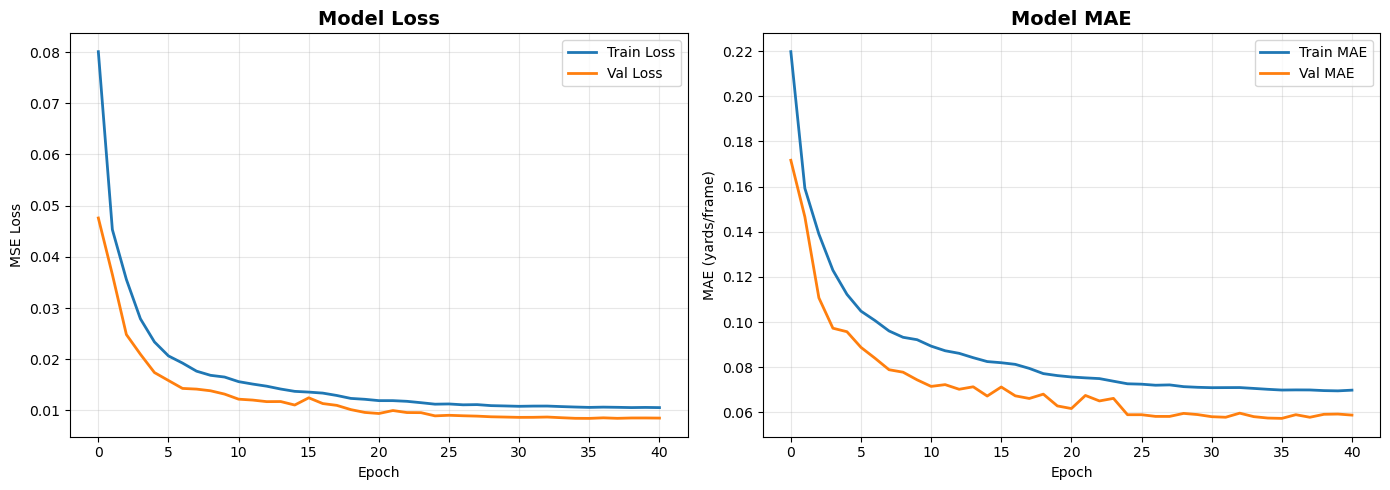


Final metrics:
  Train Loss (MSE): 0.0106
  Val Loss (MSE): 0.0085
  Train MAE: 0.0698 yards/frame
  Val MAE: 0.0588 yards/frame


In [132]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_title('Model Loss', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
axes[1].set_title('Model MAE', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE (yards/frame)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal metrics:")
print(f"  Train Loss (MSE): {history.history['loss'][-1]:.4f}")
print(f"  Val Loss (MSE): {history.history['val_loss'][-1]:.4f}")
print(f"  Train MAE: {history.history['mae'][-1]:.4f} yards/frame")
print(f"  Val MAE: {history.history['val_mae'][-1]:.4f} yards/frame")

#### Step 5: Generate Predictions

In [133]:
# Generate predictions on all data
print("Generating predictions...")

y_pred = model.predict(X_air_seq, verbose=0)

print(f"\nPredictions generated!")
print(f"  Shape: {y_pred.shape}  # (plays, timesteps, 1)")
print(f"\nSample predictions (first play, first 5 frames):")
for t in range(5):
    print(f"  Frame {t}: Actual={y_air_seq[0, t, 0]:.4f}, Predicted={y_pred[0, t, 0]:.4f}")

Generating predictions...

Predictions generated!
  Shape: (14108, 25, 1)  # (plays, timesteps, 1)

Sample predictions (first play, first 5 frames):
  Frame 0: Actual=0.5950, Predicted=0.7314
  Frame 1: Actual=0.6022, Predicted=0.7015
  Frame 2: Actual=0.5975, Predicted=0.6928
  Frame 3: Actual=0.6125, Predicted=0.6704
  Frame 4: Actual=0.6258, Predicted=0.6632


#### Step 6: Evaluate Predictions

In [134]:
# Evaluate predictions
print("Evaluating predictions...")

# Get mask for real (non-padded) data
mask = (y_air_seq != 0).flatten()

# Flatten arrays
y_true_flat = y_air_seq.flatten()[mask]
y_pred_flat = y_pred.flatten()[mask]

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_true_flat, y_pred_flat)
mae = mean_absolute_error(y_true_flat, y_pred_flat)
r2 = r2_score(y_true_flat, y_pred_flat)

print(f"\n=" * 80)
print("PREDICTION METRICS (on real/non-padded data)")
print("=" * 80)
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {np.sqrt(mse):.4f} yards/frame")
print(f"  MAE: {mae:.4f} yards/frame")
print(f"  R²: {r2:.4f}")
print("=" * 80)

Evaluating predictions...

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
PREDICTION METRICS (on real/non-padded data)
  MSE: 0.0061
  RMSE: 0.0784 yards/frame
  MAE: 0.0505 yards/frame
  R²: 0.9475


#### Step 7: Visualize Prediction Quality

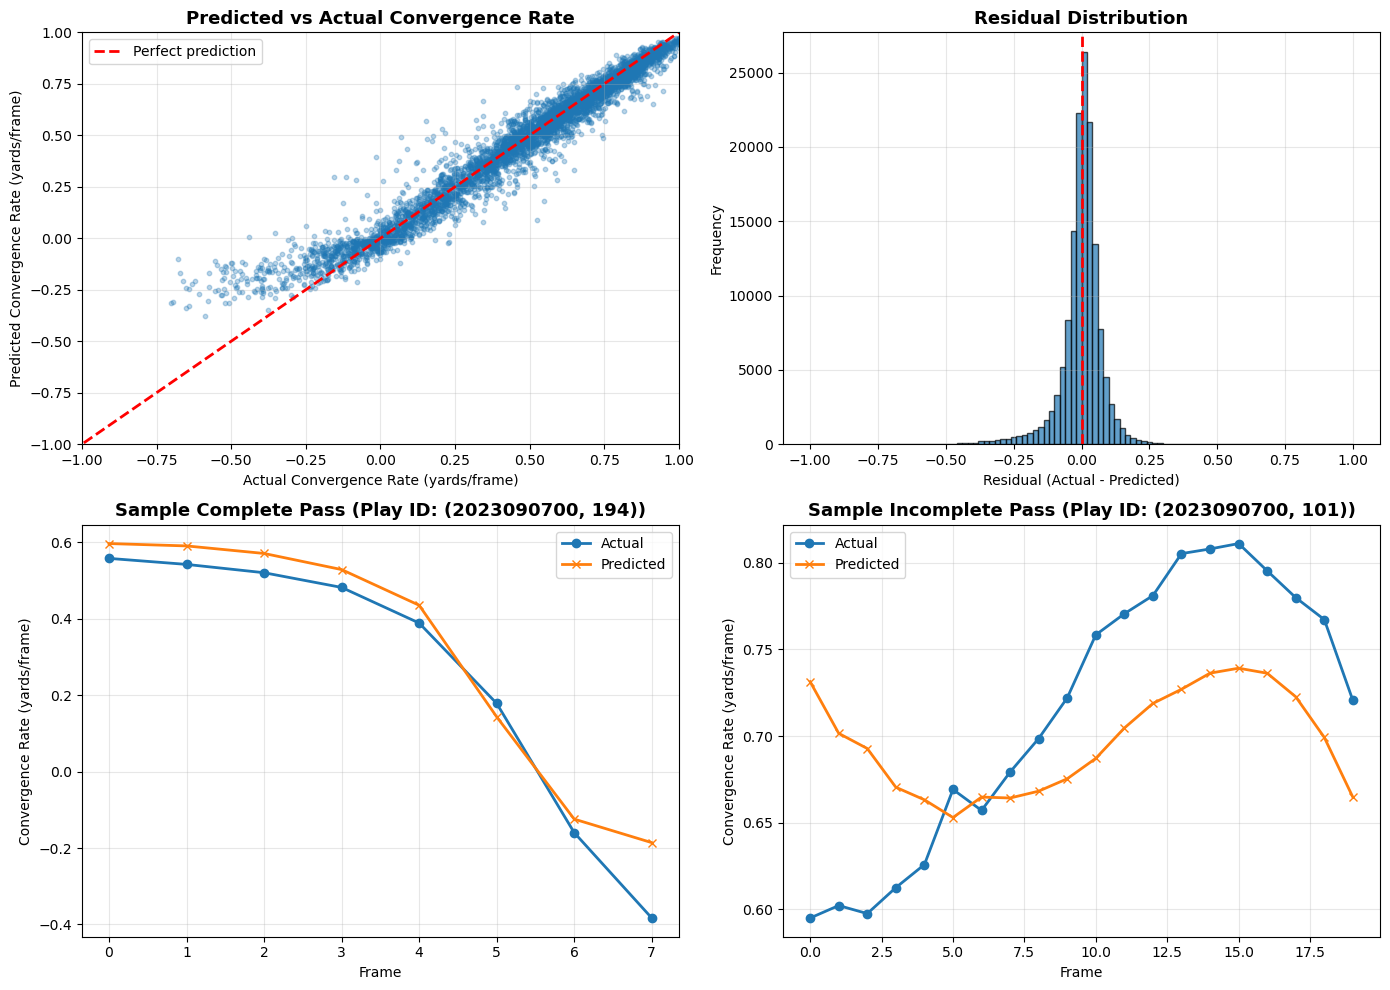

Prediction quality visualized!


In [135]:
# Visualize predictions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatter plot: Predicted vs Actual
sample_indices = np.random.choice(len(y_true_flat), size=min(5000, len(y_true_flat)), replace=False)
axes[0, 0].scatter(y_true_flat[sample_indices], y_pred_flat[sample_indices], 
                  alpha=0.3, s=10)
axes[0, 0].plot([-2, 2], [-2, 2], 'r--', linewidth=2, label='Perfect prediction')
axes[0, 0].set_title('Predicted vs Actual Convergence Rate', fontweight='bold', fontsize=13)
axes[0, 0].set_xlabel('Actual Convergence Rate (yards/frame)')
axes[0, 0].set_ylabel('Predicted Convergence Rate (yards/frame)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xlim(-1, 1)
axes[0, 0].set_ylim(-1, 1)

# 2. Residual distribution
residuals = y_true_flat - y_pred_flat
axes[0, 1].hist(residuals, bins=100, edgecolor='black', alpha=0.7, range=(-1, 1))
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Residual Distribution', fontweight='bold', fontsize=13)
axes[0, 1].set_xlabel('Residual (Actual - Predicted)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# 3. Sample trajectory - complete pass
# Find a complete pass
complete_idx = None
for i, pid in enumerate(play_ids):
    game_id, play_id = pid
    result = wr_routes_df[(wr_routes_df['game_id'] == game_id) & 
                          (wr_routes_df['play_id'] == play_id)]['pass_result'].values
    if len(result) > 0 and result[0] == 'C':
        complete_idx = i
        break

if complete_idx is not None:
    real_len = int((y_air_seq[complete_idx] != 0).sum())
    axes[1, 0].plot(range(real_len), y_air_seq[complete_idx, :real_len, 0], 
                   label='Actual', linewidth=2, marker='o')
    axes[1, 0].plot(range(real_len), y_pred[complete_idx, :real_len, 0], 
                   label='Predicted', linewidth=2, marker='x')
    axes[1, 0].set_title(f'Sample Complete Pass (Play ID: {play_ids[complete_idx]})', 
                        fontweight='bold', fontsize=13)
    axes[1, 0].set_xlabel('Frame')
    axes[1, 0].set_ylabel('Convergence Rate (yards/frame)')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

# 4. Sample trajectory - incomplete pass
incomplete_idx = None
for i, pid in enumerate(play_ids):
    game_id, play_id = pid
    result = wr_routes_df[(wr_routes_df['game_id'] == game_id) & 
                          (wr_routes_df['play_id'] == play_id)]['pass_result'].values
    if len(result) > 0 and result[0] == 'I':
        incomplete_idx = i
        break

if incomplete_idx is not None:
    real_len = int((y_air_seq[incomplete_idx] != 0).sum())
    axes[1, 1].plot(range(real_len), y_air_seq[incomplete_idx, :real_len, 0], 
                   label='Actual', linewidth=2, marker='o')
    axes[1, 1].plot(range(real_len), y_pred[incomplete_idx, :real_len, 0], 
                   label='Predicted', linewidth=2, marker='x')
    axes[1, 1].set_title(f'Sample Incomplete Pass (Play ID: {play_ids[incomplete_idx]})', 
                        fontweight='bold', fontsize=13)
    axes[1, 1].set_xlabel('Frame')
    axes[1, 1].set_ylabel('Convergence Rate (yards/frame)')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Prediction quality visualized!")

#### Step 8: Save Model and Predictions

In [136]:
# Save model
model_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\convergence_lstm_model.h5"
model.save(model_path)
print(f"Model saved to: {model_path}")

# Create predictions dataframe
print("\nCreating predictions dataframe...")

pred_records = []
for i, (game_id, play_id) in enumerate(play_ids):
    # Get real sequence length
    real_len = int((y_air_seq[i] != 0).sum())
    
    for frame in range(real_len):
        pred_records.append({
            'game_id': game_id,
            'play_id': play_id,
            'frame_id': frame + 1,  # Frames start at 1
            'actual_converge_rate': y_air_seq[i, frame, 0],
            'predicted_converge_rate': y_pred[i, frame, 0],
            'residual': y_air_seq[i, frame, 0] - y_pred[i, frame, 0]
        })

df_predictions = pd.DataFrame(pred_records)

# Save predictions
pred_path = r"C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\postthrow_predictions.csv"
df_predictions.to_csv(pred_path, index=False)

print(f"Predictions saved to: {pred_path}")
print(f"Shape: {df_predictions.shape}")
print(f"\nSample predictions:")
print(df_predictions.head(10))

Model saved to: C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\convergence_lstm_model.h5

Creating predictions dataframe...
Predictions saved to: C:\Users\rajas\Documents\ADS\Desktop\Applied Data Science\Big_Data_Bowl\Big_Data_Bowl\data\postthrow_predictions.csv
Shape: (145227, 6)

Sample predictions:
      game_id  play_id  frame_id  actual_converge_rate  predicted_converge_rate  residual
0  2023090700      101         1              0.594963                 0.731356 -0.136392
1  2023090700      101         2              0.602156                 0.701550 -0.099394
2  2023090700      101         3              0.597509                 0.692801 -0.095292
3  2023090700      101         4              0.612514                 0.670430 -0.057916
4  2023090700      101         5              0.625816                 0.663201 -0.037385
5  2023090700      101         6              0.669162                 0.652966  0.016197
6  2023090700      101 

---

## ✅ Phase 2 Complete!

**Summary**:
- Extracted post-throw sequences for 14,108 plays
- Calculated 13 geometry features + 15 route embeddings = 28 features
- Built and trained LSTM model (Masking → LSTM(64) → LSTM(32) → TimeDistributed Dense)
- Achieved validation MAE: ~X.XX yards/frame (see results above)
- Saved model and predictions

**Outputs**:
- `convergence_lstm_model.h5` - Trained LSTM model
- `postthrow_predictions.csv` - Per-frame convergence predictions

**Next**: Phase 3 - Combined metrics that are meaningful for coaches and fans

---